### 캐글즐기기 파트4 * Bayesian Statistics: Techniques and Models

### link : https://www.coursera.org/learn/mcmc-bayesian-statistics
### (베이지안) Week3. Common statistical models - 이상열


#### 7. Linear Regression (6/21, 6/28)
- Introduction to linear regression
- Setup in R
- JAGS model (linear regression)
- Model checking
- Alternative models
- Deviance information criterion (DIC)

#### 8. ANOVA (6/28)
- Introduction to ANOVA
- One way model using JAGS

#### 9. Logistic Regression (7/5)
- Introduction to logistic regression
- JAGS model (logistic regression)
- Prediction

#### Multiple Factor ANOVA (7/5)
- Multiple Factor ANOVA

### Introduction to linear regression

- https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80

- 통계학에서, 선형 회귀(線型回歸, 영어: linear regression)는 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다. 한 개의 설명 변수에 기반한 경우에는 단순 선형 회귀, 둘 이상의 설명 변수에 기반한 경우에는 다중 선형 회귀라고 한다.

- 선형 회귀는 선형 예측 함수를 사용해 회귀식을 모델링하며, 알려지지 않은 파라미터는 데이터로부터 추정한다. 이렇게 만들어진 회귀식을 선형 모델이라고 한다.

- 선형 회귀는 깊이있게 연구되고 널리 사용된 첫 번째 회귀분석 기법이다.[3] 이는 알려지지 않은 파라미터에 대해 선형 관계를 갖는 모델을 세우는 것이, 비선형 관계를 갖는 모델을 세우는 것보다 용이하기 때문이다.

- 일반적으로 최소제곱법(least square method)을 사용해 선형 회귀 모델을 세운다. 최소제곱법 외에 다른 기법으로도 선형 회귀 모델을 세울 수 있다. 손실 함수(loss fuction)를 최소화 하는 방식으로 선형 회귀 모델을 세울 수도 있다. 

![](img/week3_1.png)


#### 선형 회귀에서의 가정 [BLUE}
    - 약한 외생성. 설명 변수 x를 확률 변수가 아니라, 고정된 값으로 취급한다. 이는 설명 변수가 에러가 없음을 의미한다. 측정 오차로 인해 설명 변수가 오염되지 않았음을 가정하는 것과 같다. 이러한 가정이 현실적이지 않지만, 이 가정을 제외하면 설명 변수에 오차를 포함한 모델을 세워야 한다.

    - 선형성. 응답 변수가 예측 변수와 선형 회귀 계수의 선형 조합으로 표현 가능함을 의미한다. 이는 생각보다 까다롭지 않은 가정인데, 이것은 파라미터에 대한 선형성만 가정하기 때문이다. 예측 변수는 임의로 변형될 수도 있고, 동일한 예측 변수가 더해질 수도 있고, 하나를 다르게 변형할 수도 있다. 이러한 기법이 실제로 다항 회귀에 사용된다. 응답 변수를 예측 변수에 대한 임의의 다항 함수로 모델링한다. 이는 선형 회귀를 매우 강력하게 만든다. 실제로 이러한 다항 회귀는 때로 너무 강력해서, 모델이 데이터에 과적합(overfit)하게 되기도 한다. 이를 방지하기 위해 일종의 정규화 기법을 사용할 수도 있다. 이를 적용한 예로는 능형 회귀분석(ridge regression) 또는 Lasso 회귀 등이 있다. 베이지안 선형 회귀 또한 사용할 수 있는데, 베이지안 선형 회귀는 근본적으로 과적합을 방지하는 효과를 갖는다.

    - 상수 분산 (즉, 동분산성). 이는 서로 다른 응답 변수들의 오차가 설명 변수와 무관하게 항상 같은 분산을 가짐을 의미한다. 실제로는 이러한 가정은 타당하지 않다. 응답 변수들의 오차가 같은 분산을 갖지 않으며, 오차의 분산은 설명 변수에 영향을 받는다.

    - 오차의 독립성. 독립 변수의 오차가 서로 무관함을 가정한다. 일부 선형 회귀 기법은 상관된 오차를 다룰 수 있지만, 정규화가 적용되지 않은 상황에서는 더 많은 데이터를 필요로 한다. 베이지안 선형 회귀가 이러한 문제를 다루는 일반적인 기법이다.

    - 예측 변수에서의 다중공선성의 부재. 표준 최소제곱법 추정 기법에서, 설계 행렬 X는 반드시 전열계수 p를 갖는다. 그렇지 않으면, 예측 변수 사이에 다중공선성이 생긴다. 이는 두 개 이상의 상관된 예측 변수로 인해 발생한다. 또한, 추정하고자 하는 파라미터에 비해 데이터가 너무 적어도 발생할 수 있다. 다중공선성이 발생하면, 파라미터 벡터 β는 유일한 해를 갖지 않게 된다. 다중공선성이 있는 상황에서도 선형 회귀 모델을 만들 수 있는 기법이 개발되긴 했으나, 몇 가지 추가적인 가정이 필요하다.


![](img/week3_2.png)

- lasso 이중지수분포의 사전 분포하에서 β에 대한 사후분포. http://enook.jbnu.ac.kr/contents/19/#!/p/72

### Setup in R
#### Data
- As an example of linear regression, we’ll look at the Leinhardt data from the car package in R.

In [3]:
library("car")
data("Leinhardt")
#?Leinhardt

In [4]:
head(Leinhardt)

income infant region   oil
Australia 3426   26.7   Asia     no 
Austria   3350   23.7   Europe   no 
Belgium   3346   17.0   Europe   no 
Canada    4751   16.8   Americas no 
Denmark   5029   13.5   Europe   no 
Finland   3312   10.1   Europe   no

In [5]:
str(Leinhardt)

'data.frame':	105 obs. of  4 variables:
 $ income: int  3426 3350 3346 4751 5029 3312 3403 5040 2009 2298 ...
 $ infant: num  26.7 23.7 17 16.8 13.5 10.1 12.9 20.4 17.8 25.7 ...
 $ region: Factor w/ 4 levels "Africa","Americas",..: 3 4 4 2 4 4 4 4 4 4 ...
 $ oil   : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...


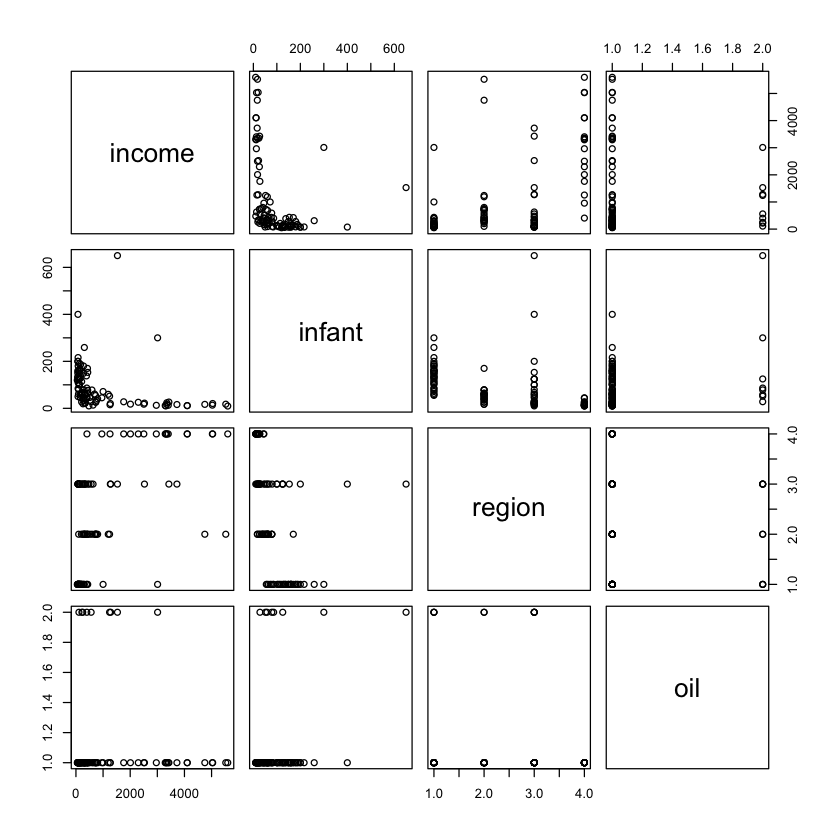

In [8]:
pairs(Leinhardt)

- 유아 사망률을 1 인당 소득과 관련시키는 간단한 선형 회귀 모형으로 시작하겠습니다.

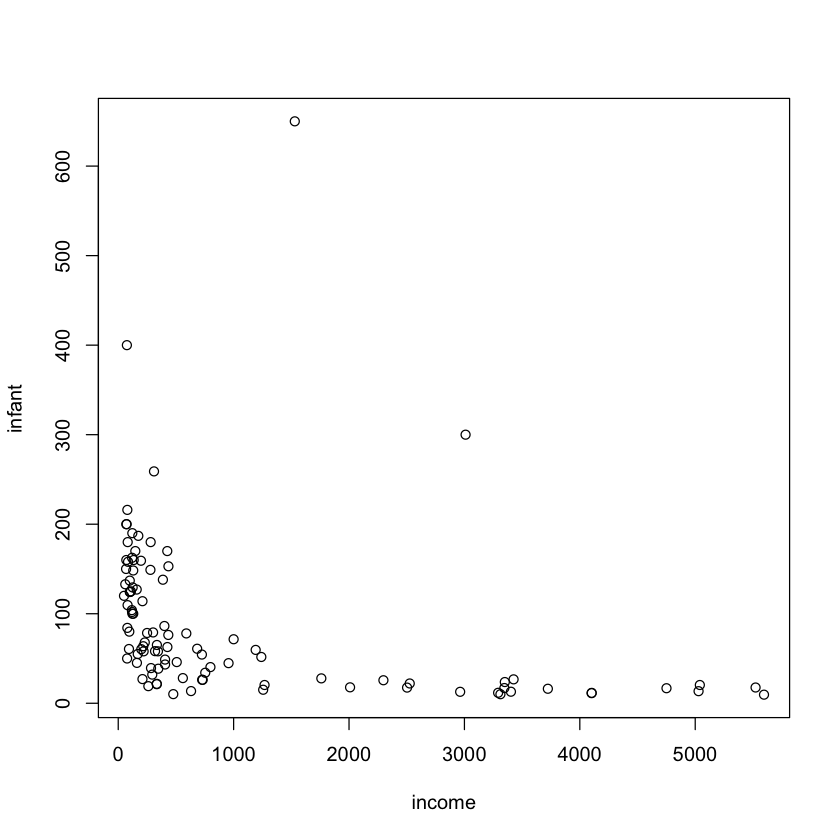

In [9]:
plot(infant ~ income, data=Leinhardt)

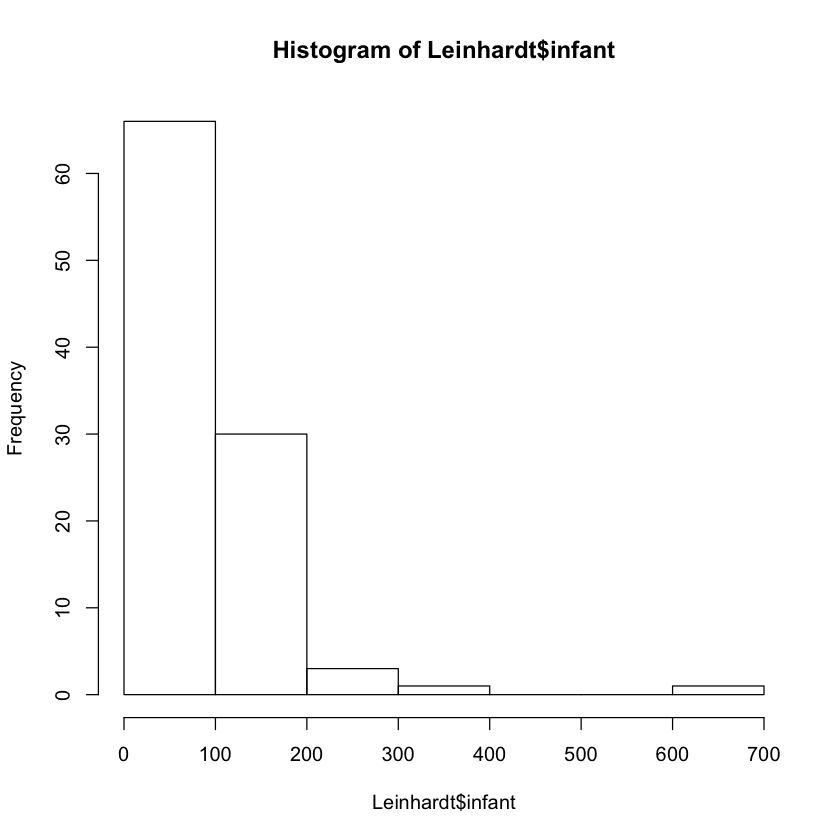

In [10]:
hist(Leinhardt$infant)

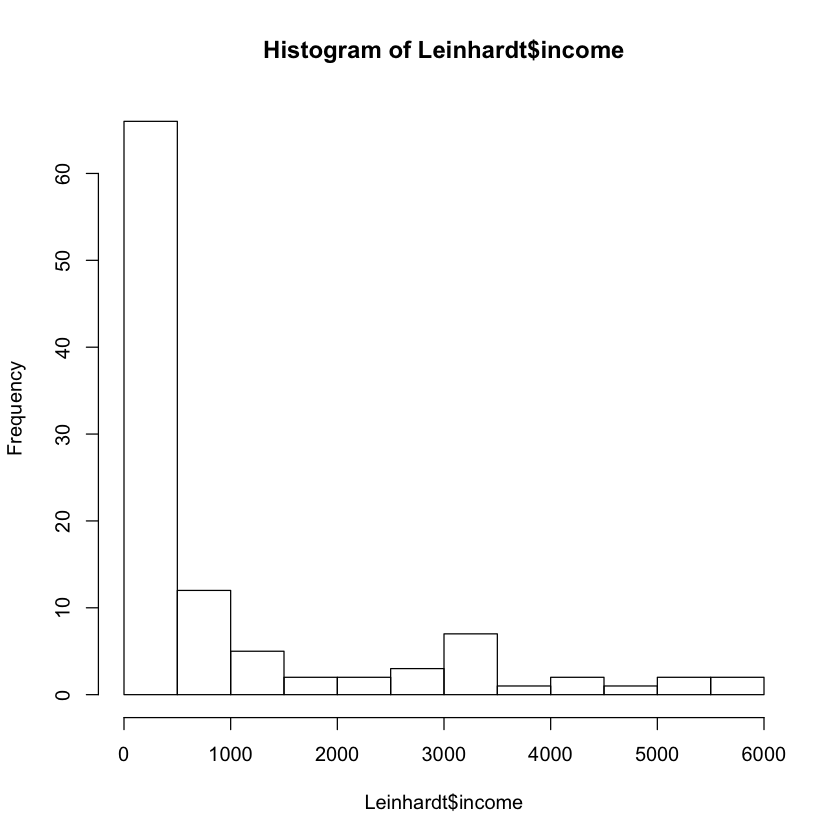

In [11]:
hist(Leinhardt$income)

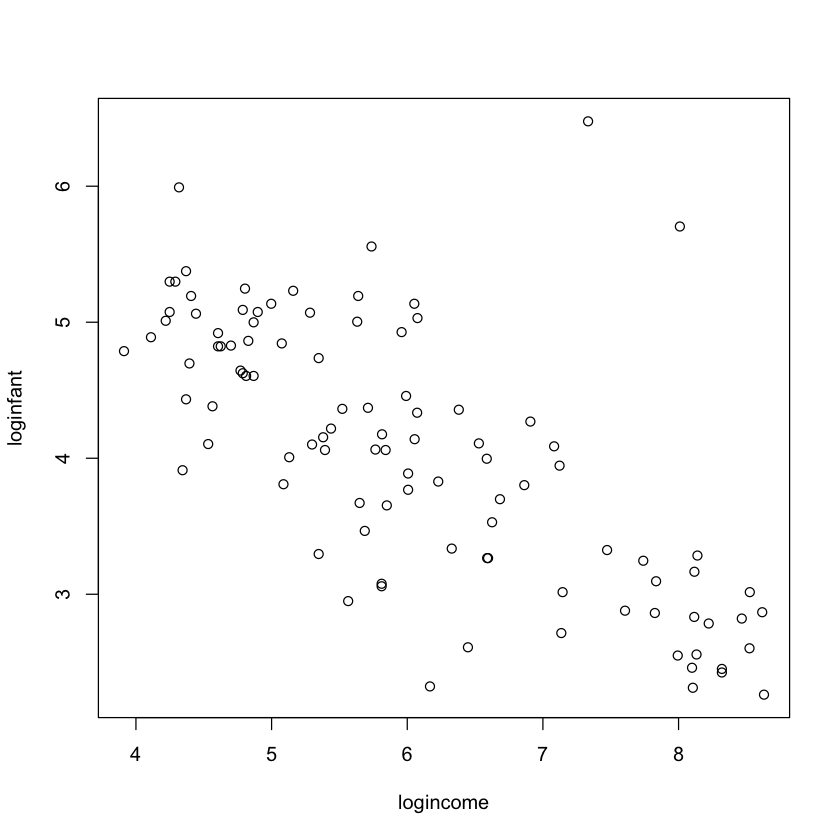

In [4]:
Leinhardt$loginfant = log(Leinhardt$infant)
Leinhardt$logincome = log(Leinhardt$income)

plot(loginfant ~ logincome, data=Leinhardt)

- 유아 사망률과 1 인당 소득은 양의 값이고 오른쪽으로 비뚤어진 양이기 때문에 로그 차원에서 모델링하는 것을 고려합니다.
- 선형 모델 이 스케일에서 훨씬 더 적절하게 나타납니다.

### Modeling
- The reference Bayesian analysis (with a noninformative prior) is available directly in R.

In [7]:
lmod = lm(loginfant ~ logincome, data=Leinhardt)
summary(lmod)


Call:
lm(formula = loginfant ~ logincome, data = Leinhardt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66694 -0.42779 -0.02649  0.30441  3.08415 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.14582    0.31654  22.575   <2e-16 ***
logincome   -0.51179    0.05122  -9.992   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6867 on 99 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.5021,	Adjusted R-squared:  0.4971 
F-statistic: 99.84 on 1 and 99 DF,  p-value: < 2.2e-16


### Leson 7.3
#### Model in JAGS
- 이 모델을 JAGS에 맞출 것입니다. 일부 국가에는 값이 누락되어 있으며 간결성을 위해 생략함
- 관측값 y[i]는 정상적인 분포 dnorm, prec를 precision(정밀도)라고 부름
- mu[i]는 선형이며, 여기서는 계수 1 + 계수 2를 로그 수입, 로그 수입의 i 번째 값으로합니다.
- y[i]는 mean mu[i]를 가진 정규 분포에서 나오며, 평균은 log_income의 선형 모델로부터 나옵니다. 이제 우리는 이 계수에 대해 우선 순위를 부여해야합니다. 우리는 1 : 2에서 j에 대한 또 다른 루프를 시작할 것입니다. 두 개의 계수이기 때문입니다.
- 베타 j는 정규 분포, dnorm에서 나올 것입니다. (평균 0.0, 분산 1.0/1.0e6)
- 우리는 관측치에 대한 정규 분포의 변형에 대해 역 감마 분포를 사용할 것입니다.
- 샘플 사이즈는 5이며 감마 매개 변수로 바꾸려면 2로 나누어야합니다. 
- 이전 샘플 크기를 다시 분산에 대한 이전 추정치와 곱해야 합니다. 10이라고 가정하고 2로 나눕니다.

In [5]:
dat = na.omit(Leinhardt)

library("rjags")

Loading required package: coda
Linked to JAGS 4.2.0
Loaded modules: basemod,bugs


In [6]:
mod1_string = " model {
    for (i in 1:n) {
        y[i] ~ dnorm(mu[i], prec)
        mu[i] = b[1] + b[2]*log_income[i] 
    }
    
    for (i in 1:2) {
        b[i] ~ dnorm(0.0, 1.0/1.0e6)
    }
    
    prec ~ dgamma(5/2.0, 5*10.0/2.0) #가정
    sig2 = 1.0 / prec
    sig = sqrt(sig2)
} "

In [7]:
set.seed(72)
data1_jags = list(y=dat$loginfant, n=nrow(dat), 
              log_income=dat$logincome)
head(data1_jags)
params1 = c("b", "sig")

$y
  [1] 3.284664 3.165475 2.833213 2.821379 2.602690 2.312535 2.557227 3.015535
  [9] 2.879198 3.246491 2.459589 2.451005 2.785011 2.424803 3.802208 4.269697
 [17] 2.261763 2.549445 2.862201 2.867899 4.457830 4.363099 4.828314 3.335770
 [25] 5.703782 4.060443 6.476972 3.945458 4.087656 5.135798 4.356709 4.139955
 [33] 3.996364 3.887730 3.325036 4.370713 3.095578 3.265759 2.610070 3.465736
 [41] 4.109233 3.828641 3.529297 4.175925 3.015535 2.714695 2.949688 3.265759
 [49] 4.334673 3.698830 3.768153 5.556828 4.100989 4.919981 5.192957 4.736198
 [57] 4.063885 4.154185 3.671225 4.927254 3.058707 4.060443 5.070161 5.003946
 [65] 2.322388 3.653252 4.218036 3.077312 3.295837 5.030438 4.605170 5.991465
 [73] 4.822698 5.298317 5.010635 4.605170 5.247024 5.075174 4.696837 4.433195
 [81] 5.375278 4.104295 4.007333 4.624973 4.999237 4.787492 5.231109 5.298317
 [89] 4.822698 4.889597 5.135798 5.062595 3.808882 4.862908 5.090678 4.844187
 [97] 5.075174 5.192957 4.382027 3.912023 4.644391

$n
[1] 101

$log_income
  [1] 8.139149 8.116716 8.115521 8.466110 8.522976 8.105308 8.132413 8.525161
  [9] 7.605392 7.739794 8.099251 8.319474 8.222285 8.319230 6.862758 6.907755
 [17] 8.629807 7.993958 7.825245 8.616676 5.991465 5.521461 4.700480 6.327937
 [25] 8.009695 5.393628 7.333023 7.122867 7.082549 6.052089 6.380123 6.054439
 [33] 6.586172 6.006353 7.473069 5.710427 7.834392 6.588926 6.447306 5.686975
 [41] 6.527958 6.228511 6.625392 5.814131 7.145196 7.135687 5.564520 6.595781
 [49] 6.073045 6.683361 6.006353 5.736572 5.298317 4.605170 5.638355 5.347108
 [57] 5.765191 5.379897 5.648974 5.958425 5.811141 5.840642 5.283204 5.631212
 [65] 6.167516 5.849325 5.438079 5.811141 5.347108 6.075346 4.867534 4.317488
 [73] 4.605170 4.290459 4.219508 4.812184 4.804021 4.248495 4.394449 4.369448
 [81] 4.369448 4.532599 5.129899 4.787492 4.867534 3.912023 5.159055 4.248495
 [89] 4.624973 4.110874 4.997212 4.442651 5.087596 4.828314 4.787492 5.075174
 [97] 4.897840 4.406719 4.564348 4.343805 4.770685

In [8]:
inits1 = function() {
    inits = list("b"=rnorm(2,0.0,100.0), "prec"=rgamma(1,1.0,1.0))
}

In [9]:
mod1 = jags.model(textConnection(mod1_string), data=data1_jags, inits=inits1, n.chains=3)
update(mod1, 1000) # burn-in

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 101
   Unobserved stochastic nodes: 3
   Total graph size: 411

Initializing model



In [10]:
mod1_sim = coda.samples(model=mod1,
                        variable.names=params1,
                        n.iter=5000)

In [11]:
mod1_csim = do.call(rbind, mod1_sim) # combine multiple chains

In [13]:
head(mod1_csim)

b[1]     b[2]       sig      
[1,] 7.252551 -0.5391433 1.1087656
[2,] 7.427175 -0.5410946 0.9762802
[3,] 7.396212 -0.5498439 0.9289087
[4,] 7.273703 -0.5321297 0.9396048
[5,] 7.410068 -0.5424121 1.0644470
[6,] 7.270765 -0.5279337 0.8755710

In [14]:
dim(mod1_csim)

[1] 15000     3

### Lesson 7.4
#### MCMC convergence
- 모델에서 추론을 확인하기 전에 마르코프 체인에 대한 변환 진단을 수행해야합니다.

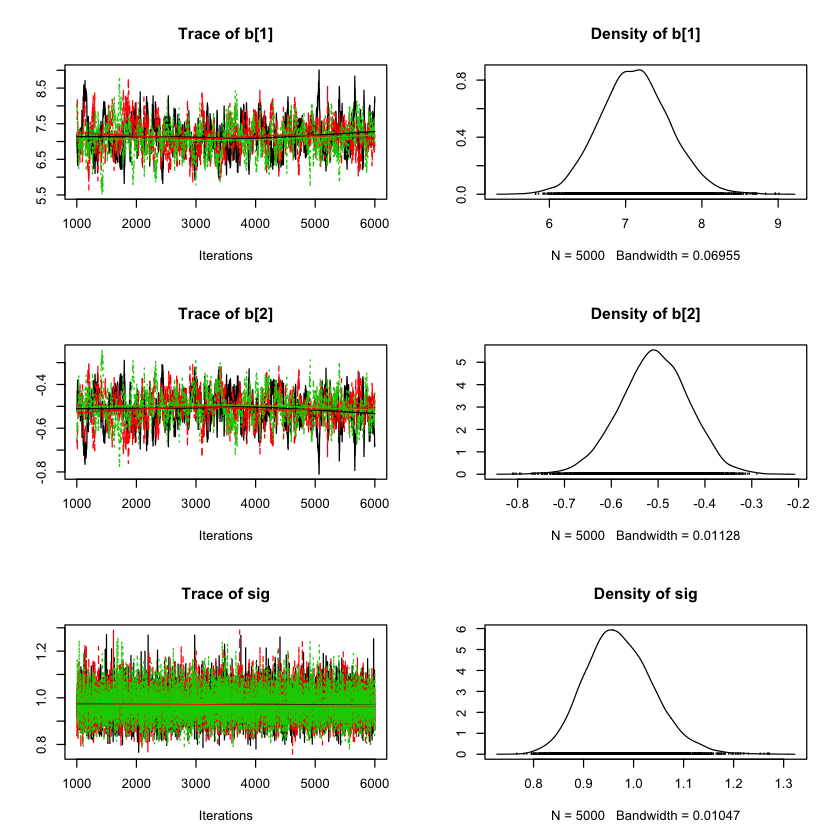

In [21]:
plot(mod1_sim)

In [22]:
gelman.diag(mod1_sim)

Potential scale reduction factors:

     Point est. Upper C.I.
b[1]       1.01       1.02
b[2]       1.01       1.02
sig        1.00       1.00

Multivariate psrf

1.01

In [23]:
autocorr.diag(mod1_sim)

b[1]      b[2]      sig        
Lag 0  1.0000000 1.0000000 1.000000000
Lag 1  0.9533898 0.9529337 0.016696150
Lag 5  0.7791936 0.7778997 0.003563609
Lag 10 0.5937995 0.5924153 0.003885813
Lag 50 0.1049901 0.1054723 0.008361750

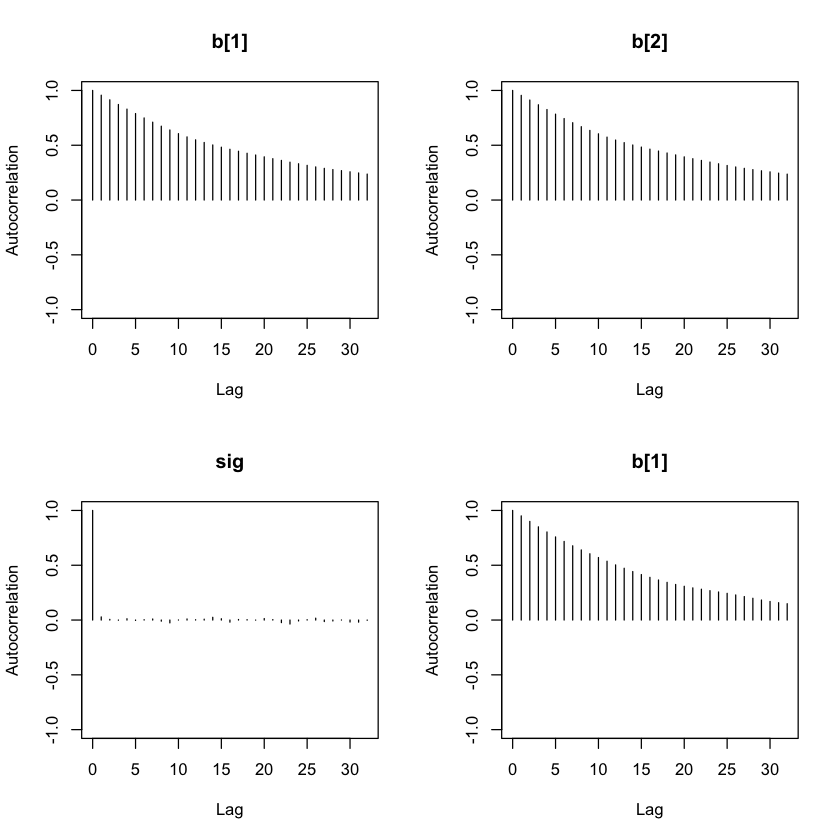

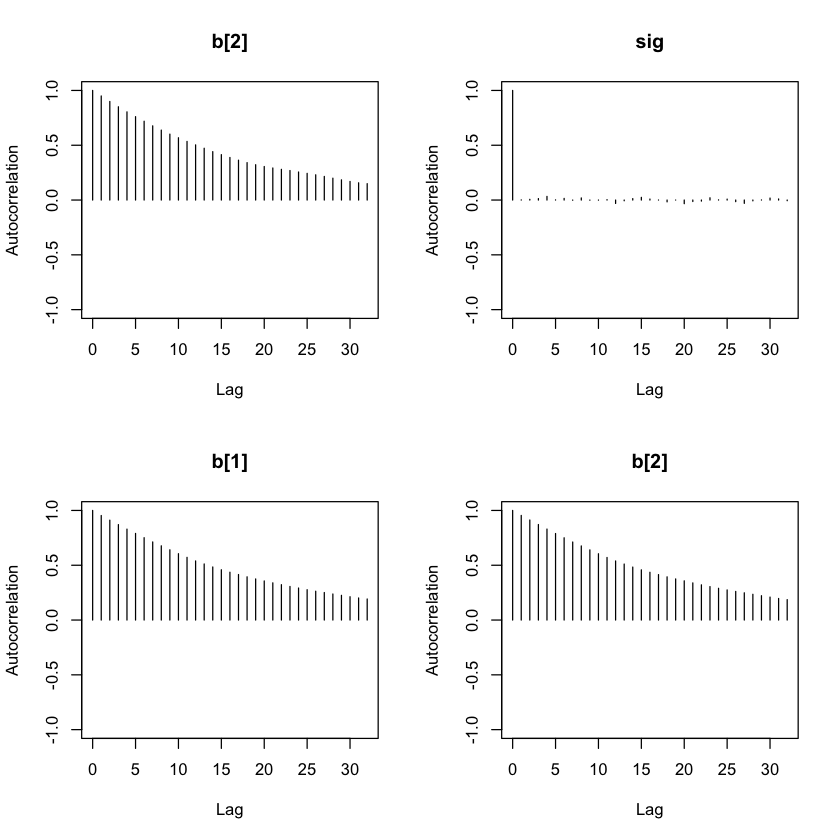

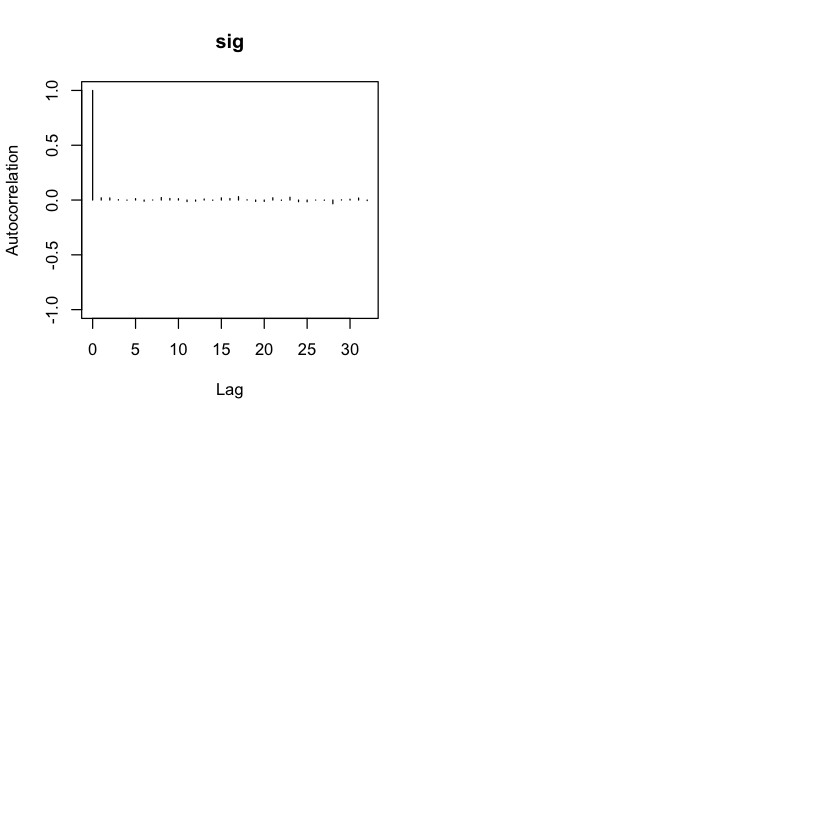

In [24]:
autocorr.plot(mod1_sim)

In [25]:
effectiveSize(mod1_sim)

b[1]       b[2]        sig 
  373.3675   383.5452 14522.4730

In [15]:
summary(mod1_sim)


Iterations = 1001:6000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

        Mean      SD  Naive SE Time-series SE
b[1]  7.1585 0.45179 0.0036889      0.0236089
b[2] -0.5138 0.07295 0.0005957      0.0039000
sig   0.9716 0.06738 0.0005502      0.0005535

2. Quantiles for each variable:

        2.5%     25%     50%     75%   97.5%
b[1]  6.3017  6.8476  7.1575  7.4560  8.0786
b[2] -0.6625 -0.5621 -0.5134 -0.4634 -0.3757
sig   0.8494  0.9254  0.9684  1.0145  1.1108


In [16]:
lmod = lm(loginfant ~ logincome, data=Leinhardt)
summary(lmod)


Call:
lm(formula = loginfant ~ logincome, data = Leinhardt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66694 -0.42779 -0.02649  0.30441  3.08415 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.14582    0.31654  22.575   <2e-16 ***
logincome   -0.51179    0.05122  -9.992   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6867 on 99 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.5021,	Adjusted R-squared:  0.4971 
F-statistic: 99.84 on 1 and 99 DF,  p-value: < 2.2e-16


- 이 결과가 영아 사망의 대수와 소득의 대수를 연결하는 회귀 모형에 해당한다는 것을 잊지 마십시오.

### Residual checks
- 선형 모델의 경우 잔차 (모델과 응답 사이의 차이)는 모델을 지정하기 위해 가정에 대한 위반을 나타낼 수 있기 때문에 중요합니다. 
- 특히 우리는 모델이 선형이 아니거나, 정규 분포가 아니거나, 관측치가 독립적이지 않다는 표시를 찾고있다 (공변량에 조건부 임).

- 먼저, 변환되지 않은 변수에 참조 선형 모델을 맞추면 어떤 일이 일어 났을지 봅시다.


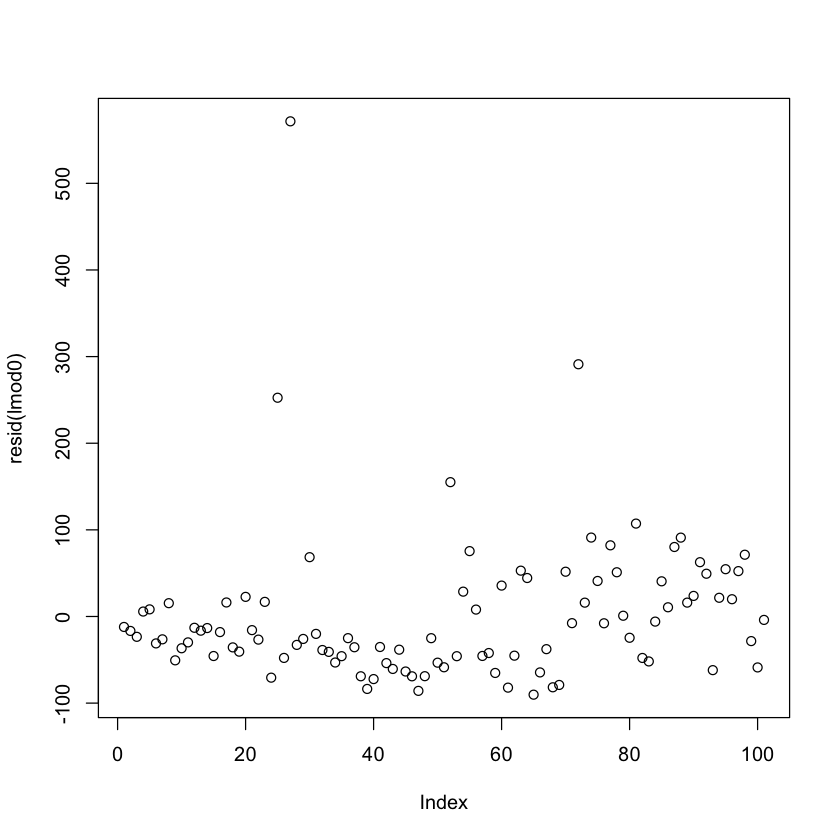

In [17]:
lmod0 = lm(infant ~ income, data=Leinhardt)
plot(resid(lmod0)) # to check independence (looks okay)

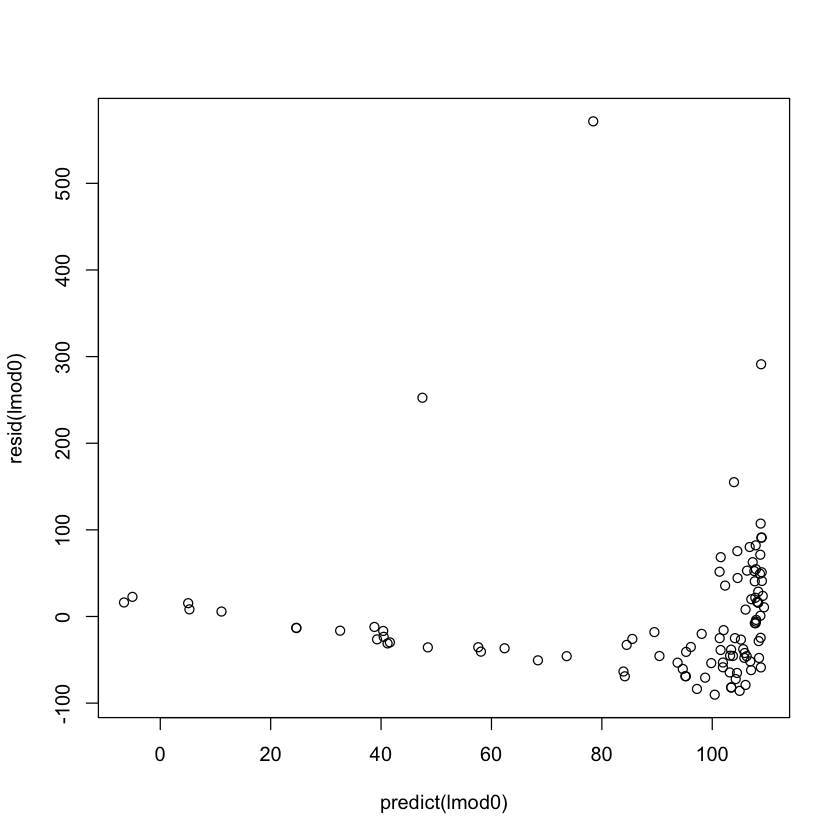

In [28]:
plot(predict(lmod0), resid(lmod0)) # to check for linearity, constant variance (looks bad)

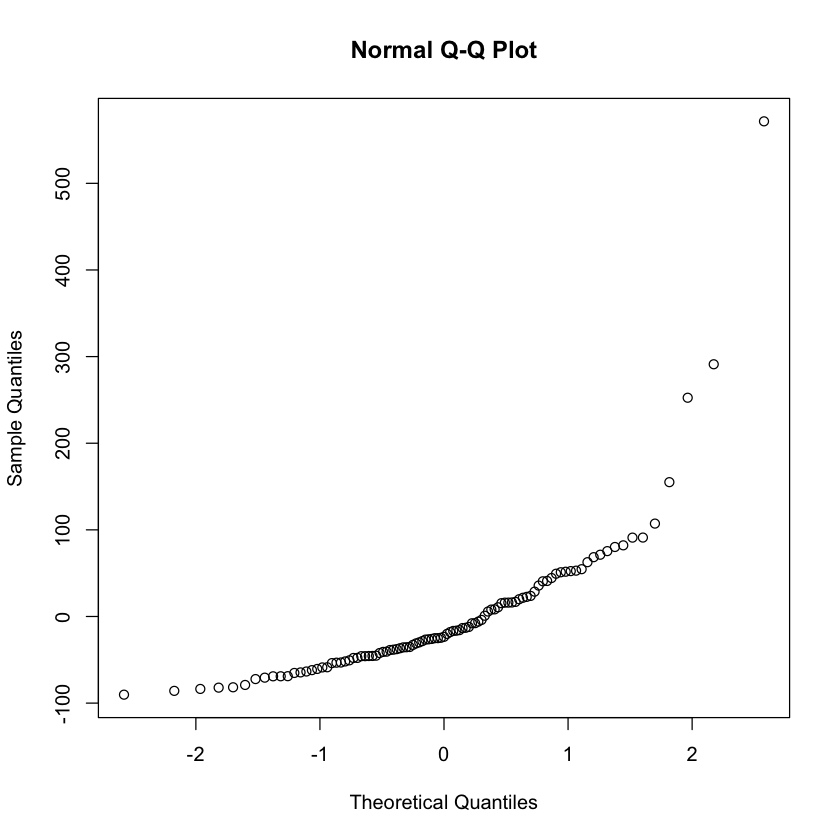

In [29]:
qqnorm(resid(lmod0)) # to check Normality assumption (we want this to be a straight line)

- 이제 로그로 변환 된 변수에 대한 우리 모델로 돌아 가자. 
- 베이지안 모델에서는 잔차에 대한 분포를 갖지만 매개 변수의 사후 평균에서 계산 된 잔차 만 단순화하고 살펴볼 것입니다.

In [31]:
X = cbind(rep(1.0, data1_jags$n), data1_jags$log_income)
head(X)

[,1] [,2]    
[1,] 1    8.139149
[2,] 1    8.116716
[3,] 1    8.115521
[4,] 1    8.466110
[5,] 1    8.522976
[6,] 1    8.105308

In [32]:
(pm_params1 = colMeans(mod1_csim)) # posterior mean

b[1]       b[2]        sig 
 7.1219485 -0.5080300  0.9718062

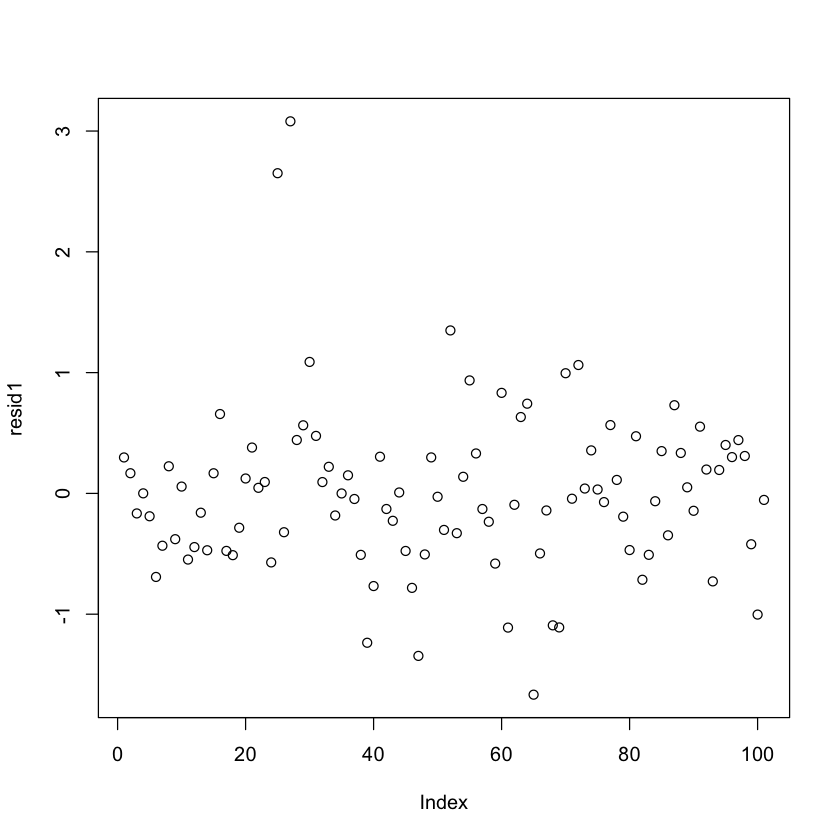

In [33]:
yhat1 = drop(X %*% pm_params1[1:2])
resid1 = data1_jags$y - yhat1
plot(resid1) # against data index

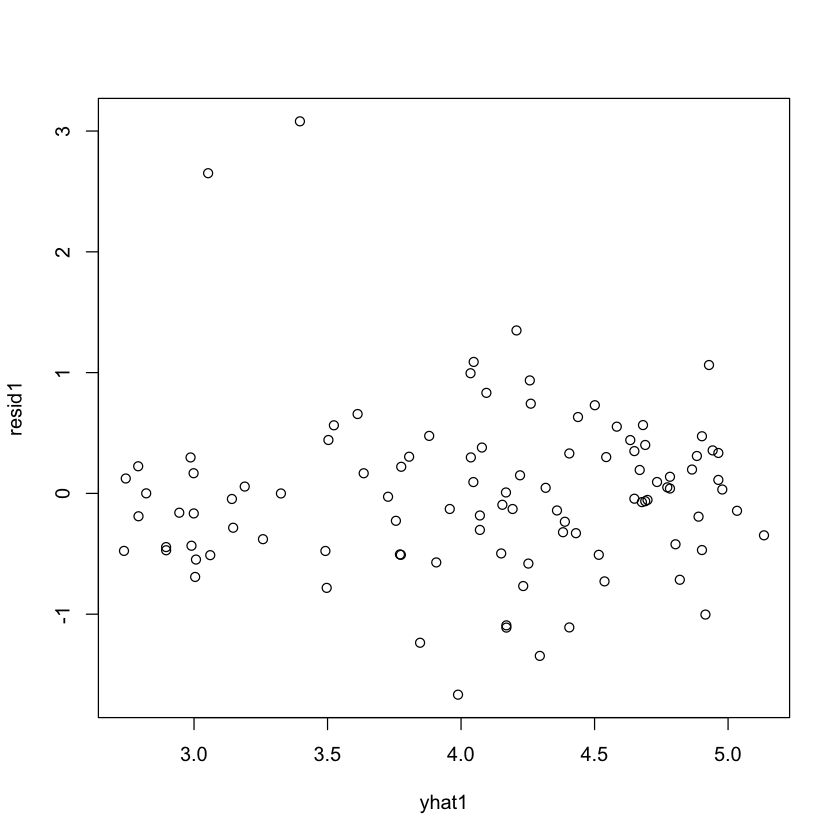

In [34]:
plot(yhat1, resid1) # against predicted values

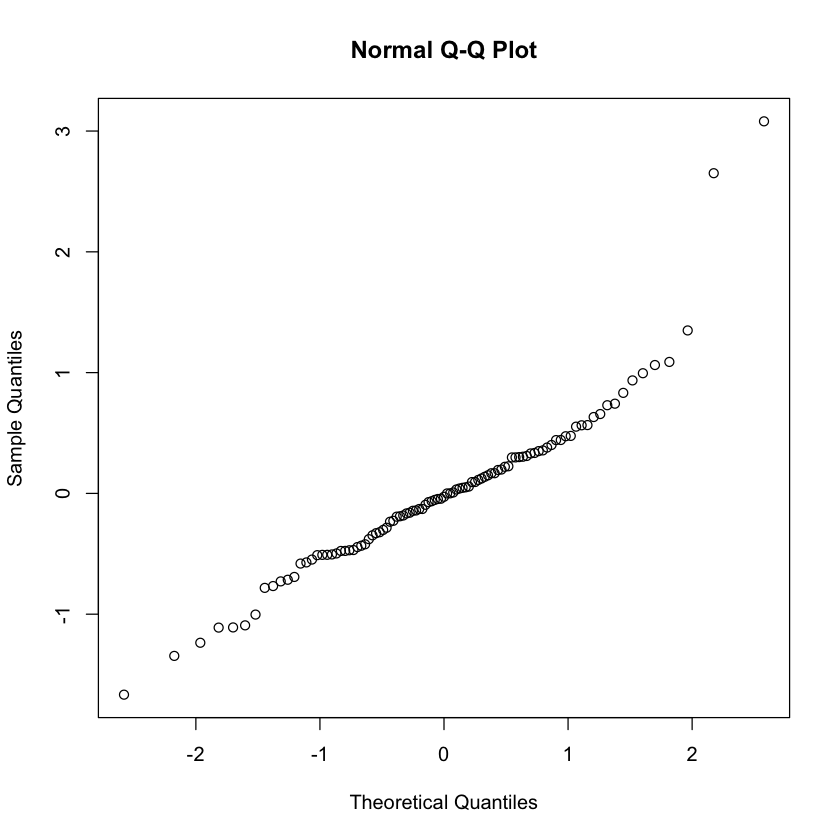

In [35]:
qqnorm(resid1) # checking normality of residuals

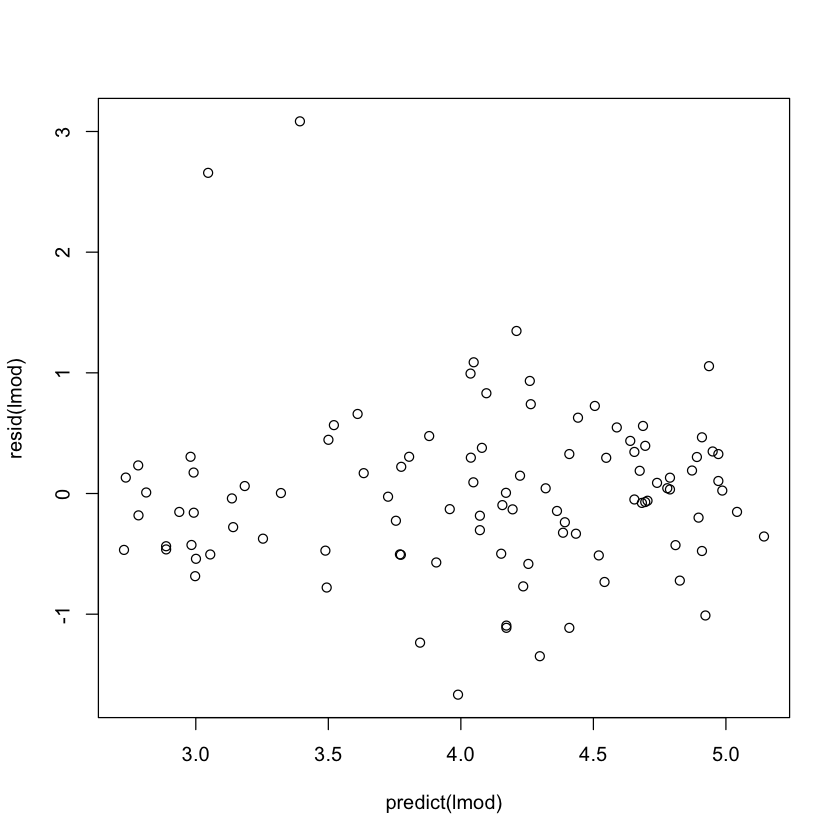

In [37]:
plot(predict(lmod), resid(lmod)) # to compare with reference linear model

In [38]:
rownames(dat)[order(resid1, decreasing=TRUE)[1:5]] # which countries have the largest positive residuals?

[1] "Saudi.Arabia" "Libya"        "Zambia"       "Brazil"       "Afganistan"

- 잔차는 사우디 아라비아와 리비아의 두 가지 강한 외계인을 제외하고는 꽤 잘 보입니다 (패턴, 모양 없음). 
- 특이치가 나타나면 데이터 입력시 오류가 아닌지 다시 한 번 확인하는 것이 좋습니다. 
- 값이 정확하면 모델링하려는 데이터를 실제로 나타내는 데이터 포인트인지 다시 생각해 볼 수 있습니다. 그렇지 않은 경우 (예 : 다른 연도에 기록 된 경우) 데이터 세트에서 이러한 데이터 요소를 삭제할 수 있습니다.
- 특이치가 데이터의 일부이며 제거되어서는 안된다고 판단되면이를 해결할 수있는 몇 가지 모델링 옵션이 있습니다. 우리는 다음 부분에서 이를 설명 할 것입니다.

### Lesson 7.5
- 이전 연구에서 우리는 유아 사망률의 대수를 소득의 대수와 관련시키는 모형에서 두 개의 특이점을 보았다. 여기서 우리는이 특이 치가 데이터 세트에 속한다고 결론을 내릴 때의 옵션을 논의 할 것입니다.

#### 추가 공변량
- 첫 번째 방법은 이상 치를 설명 할 수있는 추가 공변량을 찾는 것입니다. 예를 들어, 소득이 제공하는 것 이상으로 영아 사망률에 대한 정보를 제공하는 다양한 변수가있을 수 있습니다.

- 우리의 데이터를 되돌아 보면 아직 사용하지 않은 두 가지 변수가 있습니다 : 지역 및 석유. 오일 변수는 석유 수출국을 가리 킵니다. 사우디 아라비아와 리비아는 모두 석유 수출 국가이기 때문에 아마도 이것은 변칙의 일부를 설명 할 수 있습니다.

In [39]:
library("rjags")

mod2_string = " model {
    for (i in 1:length(y)) {
        y[i] ~ dnorm(mu[i], prec)
        mu[i] = b[1] + b[2]*log_income[i] + b[3]*is_oil[i]
    }
    
    for (i in 1:3) {
        b[i] ~ dnorm(0.0, 1.0/1.0e6)
    }
    
    prec ~ dgamma(5/2.0, 5*10.0/2.0)
    sig = sqrt( 1.0 / prec )
} "


set.seed(73)
data2_jags = list(y=dat$loginfant, log_income=dat$logincome,
                  is_oil=as.numeric(dat$oil=="yes"))
data2_jags$is_oil

params2 = c("b", "sig")

inits2 = function() {
    inits = list("b"=rnorm(3,0.0,100.0), "prec"=rgamma(1,1.0,1.0))
}

mod2 = jags.model(textConnection(mod2_string), data=data2_jags, inits=inits2, n.chains=3)
update(mod2, 1e3) # burn-in

mod2_sim = coda.samples(model=mod2,
                        variable.names=params2,
                        n.iter=5e3)

mod2_csim = as.mcmc(do.call(rbind, mod2_sim)) # combine multiple chains

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 101
   Unobserved stochastic nodes: 4
   Total graph size: 517

Initializing model



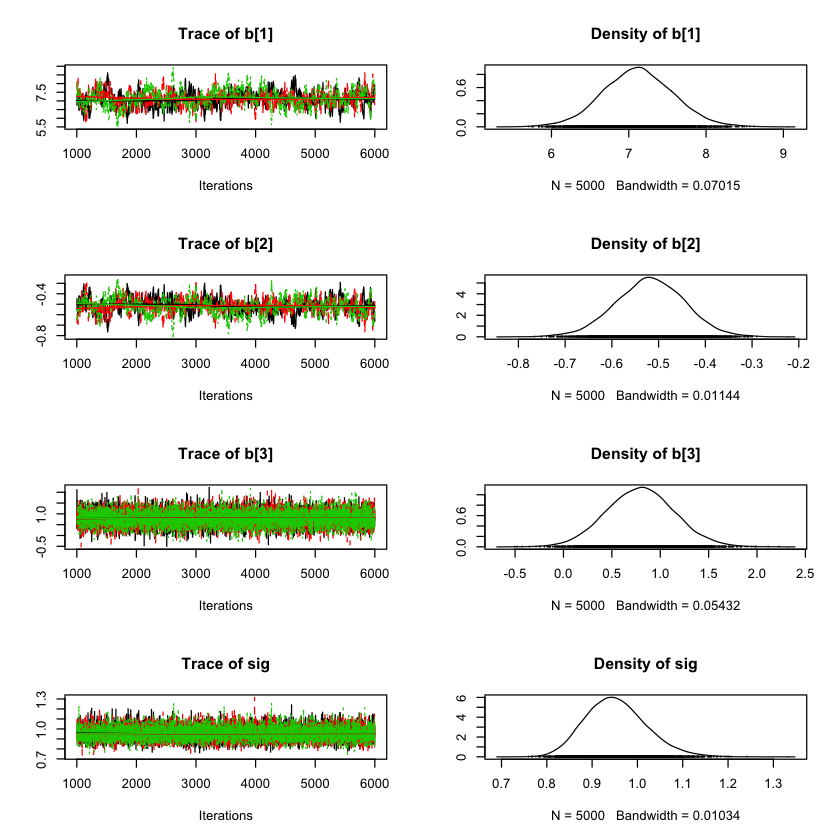

In [40]:
plot(mod2_sim)

Potential scale reduction factors:

     Point est. Upper C.I.
b[1]       1.02       1.03
b[2]       1.02       1.04
b[3]       1.00       1.00
sig        1.00       1.00

Multivariate psrf

1.01

b[1]      b[2]      b[3]         sig         
Lag 0  1.0000000 1.0000000  1.000000000  1.000000000
Lag 1  0.9553007 0.9555094  0.069767716  0.021822910
Lag 5  0.7924904 0.7902563 -0.002672390  0.009366723
Lag 10 0.6284359 0.6245529 -0.001905663 -0.001815700
Lag 50 0.1607659 0.1597546 -0.008405041  0.005364753

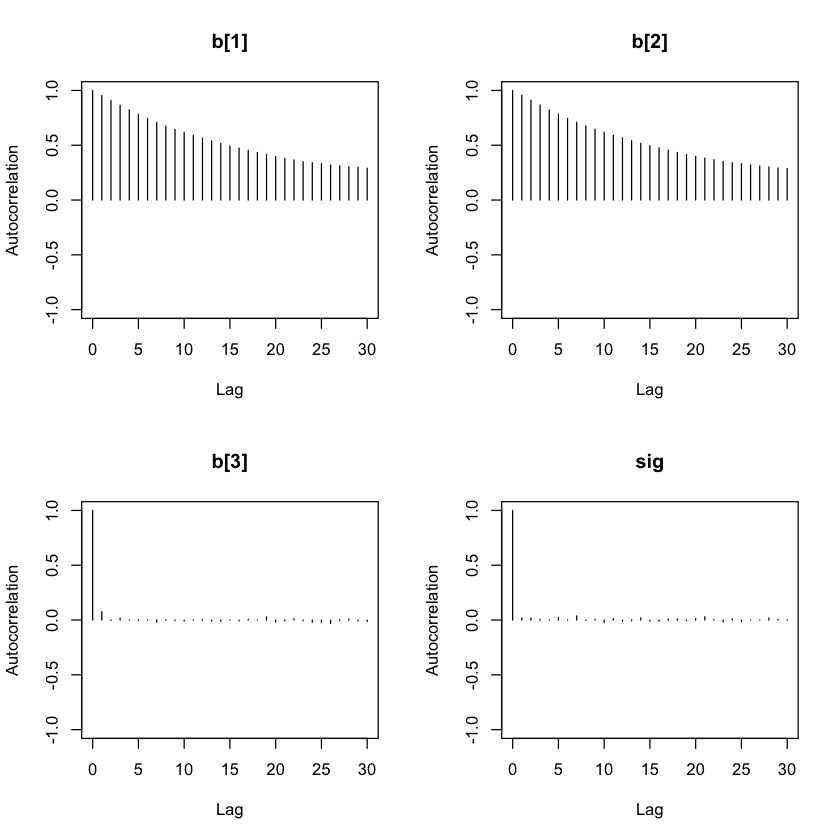

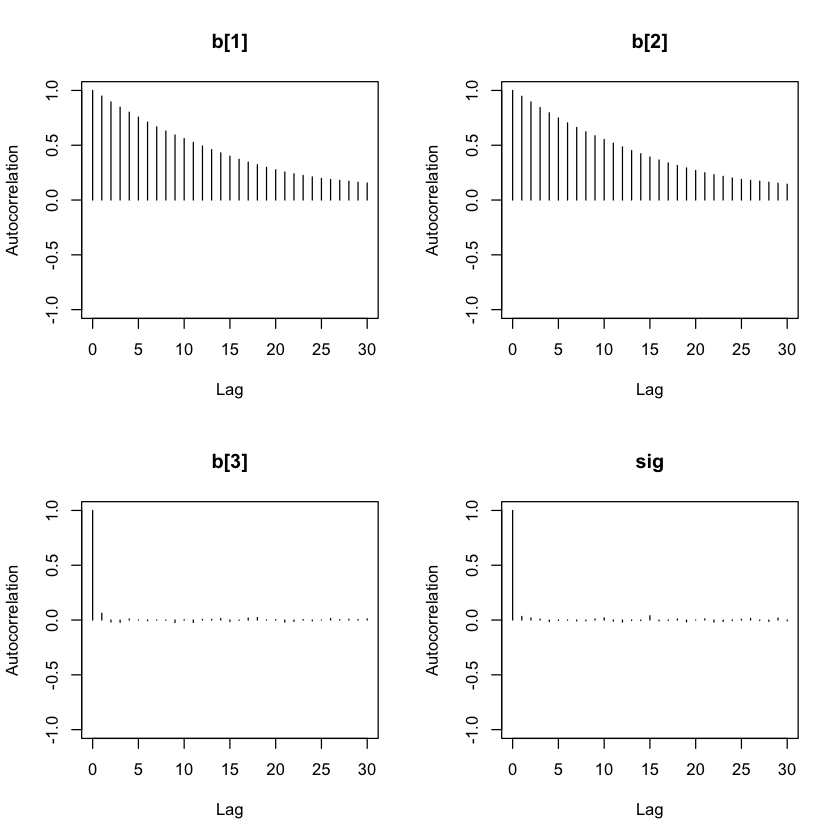

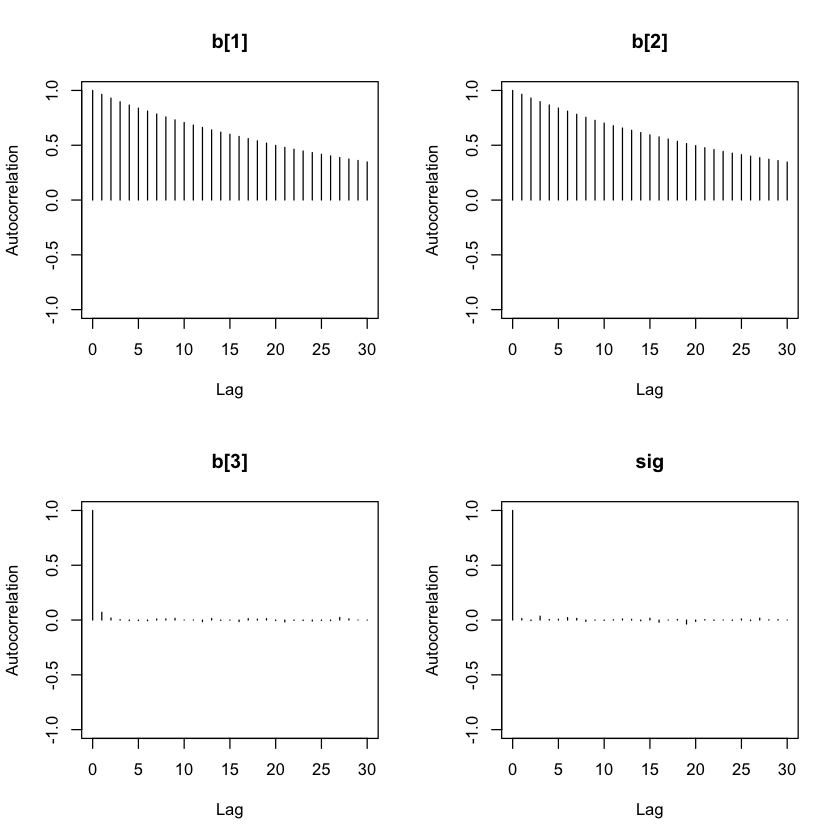

In [41]:
gelman.diag(mod2_sim)
autocorr.diag(mod2_sim)

autocorr.plot(mod2_sim)

In [42]:
effectiveSize(mod2_sim)

b[1]       b[2]       b[3]        sig 
  353.6326   341.4065 13242.5365 14251.6022

In [43]:
summary(mod2_sim)


Iterations = 1001:6000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

        Mean      SD  Naive SE Time-series SE
b[1]  7.1203 0.45589 0.0037224      0.0250051
b[2] -0.5183 0.07406 0.0006047      0.0041180
b[3]  0.7969 0.35130 0.0028684      0.0030543
sig   0.9528 0.06712 0.0005480      0.0005626

2. Quantiles for each variable:

        2.5%     25%     50%     75%   97.5%
b[1]  6.2232  6.8123  7.1174  7.4191  8.0344
b[2] -0.6661 -0.5672 -0.5177 -0.4682 -0.3752
b[3]  0.1180  0.5602  0.7973  1.0301  1.4983
sig   0.8334  0.9057  0.9489  0.9952  1.0967


- 석유 생산과 대유행 사망 사이에는 긍정적 인 관계가 있는 것처럼 보입니다. 
- 이러한 자료는 단지 관측적인 것이기 때문에 석유 생산이 영아 사망률을 증가 시킨다는 것을 말할 수는 없지만 (사실 가장 확실한 것은 아닙니다), 
- 우리는 이들이 긍정적으로 상관 관계가 있다고 말할 수 있습니다.
- 이제 잔차를 확인해 봅시다.

In [44]:
X2 = cbind(rep(1.0, data1_jags$n), data2_jags$log_income, data2_jags$is_oil)
head(X2)

[,1] [,2]     [,3]
[1,] 1    8.139149 0   
[2,] 1    8.116716 0   
[3,] 1    8.115521 0   
[4,] 1    8.466110 0   
[5,] 1    8.522976 0   
[6,] 1    8.105308 0

In [45]:
(pm_params2 = colMeans(mod2_csim)) # posterior mean

b[1]       b[2]       b[3]        sig 
 7.1203437 -0.5183098  0.7969424  0.9527914

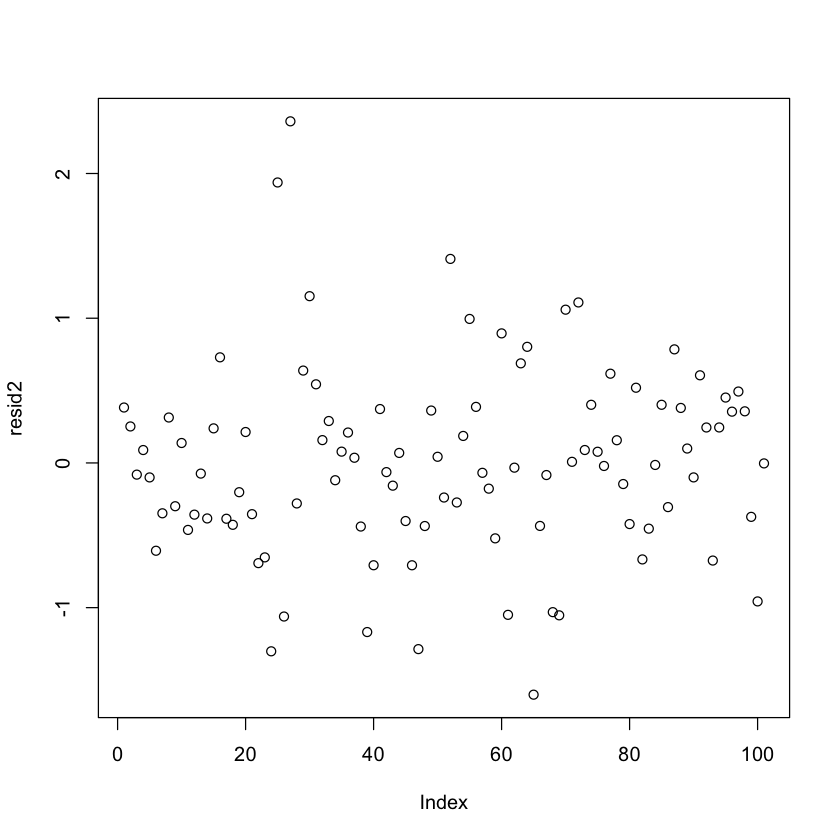

In [46]:
yhat2 = drop(X2 %*% pm_params2[1:3])
resid2 = data2_jags$y - yhat2
plot(resid2) # against data index

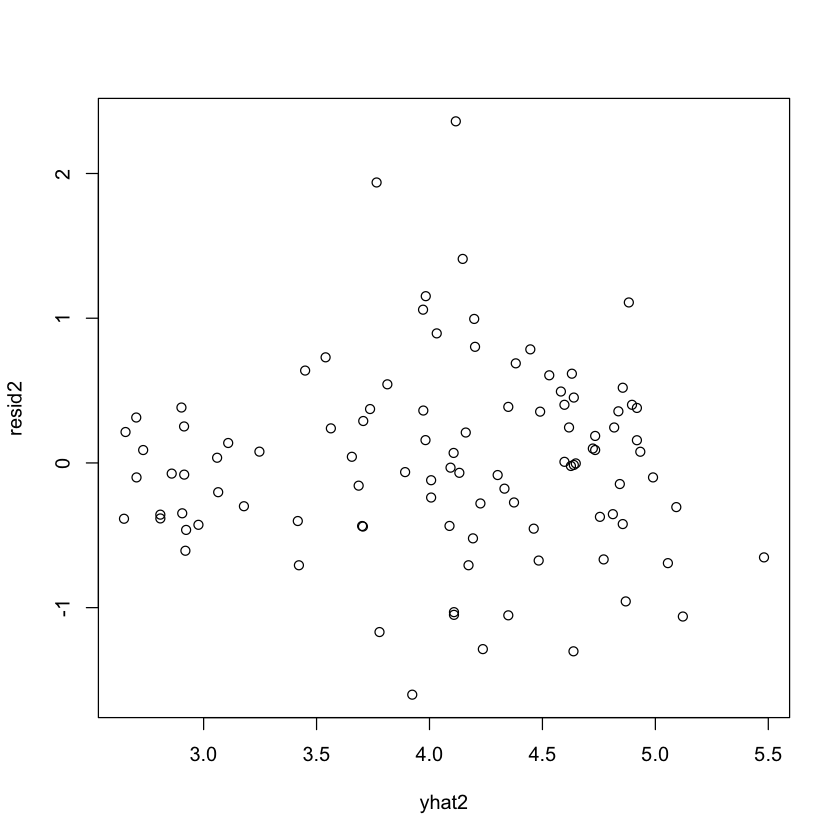

In [47]:
plot(yhat2, resid2) # against predicted values

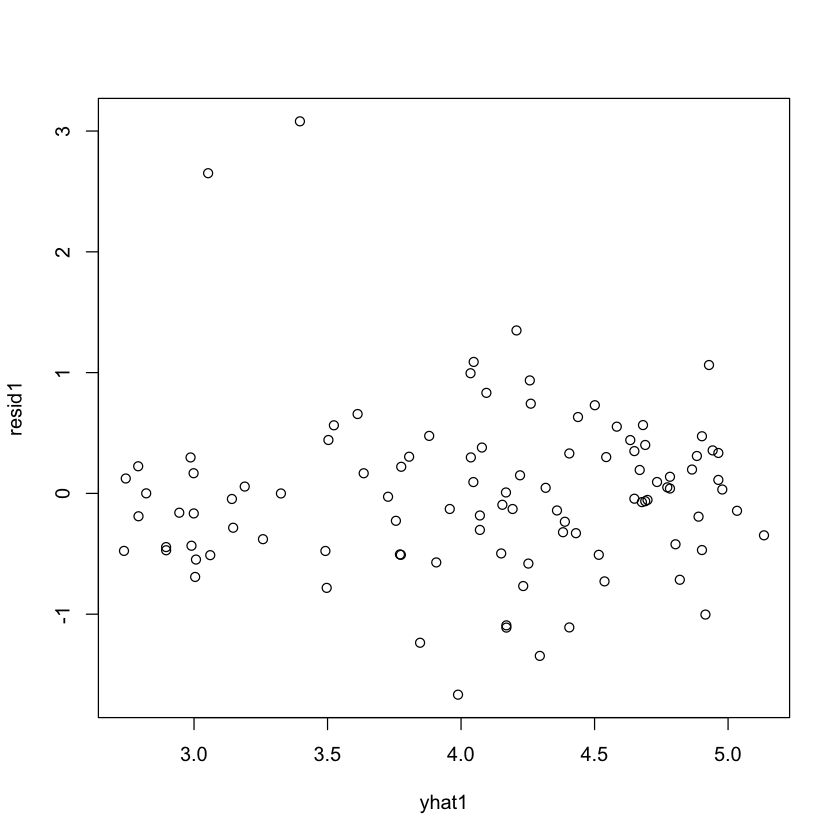

In [48]:
plot(yhat1, resid1) # residuals from the first model

In [49]:
sd(resid2) # standard deviation of residuals

[1] 0.648884

- 사우디 아라비아와 리비아의 잔차는 잔차의 평균으로부터 여전히 3 표준 편차 이상 떨어져 있지만 훨씬 더 좋아 보입니다.
- 우리는 다른 공변량 영역을 추가하는 것을 고려할 수 있지만, 강한 특이 치에 직면했을 때 또 다른 옵션을 살펴 보겠습니다.

### likelihood

- 가능성을 바꾸는 것을 고려해 봅시다. 정상 확률은 얇은 꼬리를 가지고 있습니다 (거의 모든 확률이 평균으로부터의 처음 몇 표준 편차 내에 집중되어 있음). 
- 이것은 특이치를 잘 수용하지 못합니다. 결과적으로, 정상 확률을 갖는 모델은 특이치에 지나치게 영향을받을 수있다. 
- t 분포는 정규 분포와 유사하지만 특이치를 수용 할 수있는 두꺼운 꼬리가 있음을 상기하십시오.

- t 선형 모델은 이와 같이 보일 수 있습니다. 
- t 분포에는 양수의 "자유도"매개 변수를 포함하여 세 개의 매개 변수가 있습니다. 
- 자유도가 낮을수록 배포판의 꼬리가 무거워집니다. 우리는 자유의 정도를 어느 정도 수정하거나 사전 분배를 할 수 있습니다.

In [51]:
mod3_string = " model {
    for (i in 1:length(y)) {
        y[i] ~ dt( mu[i], tau, df )
        mu[i] = b[1] + b[2]*log_income[i] + b[3]*is_oil
    }
    
    for (i in 1:3) {
        b[i] ~ dnorm(0.0, 1.0/1.0e6)
    }
    
    df = nu + 2.0 # we want degrees of freedom > 2 to guarantee existence of mean and variance
    nu ~ dexp(1.0)
    
    tau ~ dgamma(5/2.0, 5*10.0/2.0) # tau is close to, but not equal to the precision
    sig = sqrt( 1.0 / tau * df / (df - 2.0) ) # standard deviation of errors
} "

### Lesson 7.6
#### Deviance Information Criterion을 사용하여 모델 비교
- 우리는 이제 세 가지 모델을 제안했습니다. 데이터의 실적을 어떻게 비교합니까? 이전 코스에서는 최대 우도 방법을 사용하여 모델에서 매개 변수를 추정하는 방법에 대해 설명했습니다. 마찬가지로, 같은 아이디어를 사용하여 경쟁 모델 중에서 선택할 수 있습니다.
- 우리는 편차 정보 기준 (DIC)으로 알려진 양을 사용할 것입니다. 본질적으로 대수 우도의 사후 평균을 계산하고 모델 복잡성에 대한 패널티를 추가합니다.
- 처음 두 모델에 대한 DIC를 계산해 봅시다.

- 모형 선택의 기준은 주어진 자료에 대한 설명력과 설명 변수에 대한 경제성 관점에서 바라볼 수 있는데 일반적으로 이 두 관점은 서로 상충되기 때문에, 모형에 대한 일종의 penalty 역할을 하게 된다. 그러한 관점에 입각하여, Spiegelhalter 등 (2002)는 DIC(deviance information criterion)를 제시하였다.

- DIC는 계층적 모형에 대한 AIC와 BIC 기준을 일반화한 형태라고 할 수 있다. 특히, 이는 MCMC 방법을 통해 얻어지는 사후분포에서 계산할 수 있으므로 Bayesian 모형 선택 기준으로 자주 쓰인다. DIC는 모형이 자료에 얼마나 적합한지에 대한 Deviance D(θ) = −2 log(p(y|θ))의 평균값 D¯ = Eθ[D(θ)]과 필요 변수의 갯수를 의미하는 pD = D¯ − D(¯θ)를 결합한 것이다.

- DIC = pD (penalty) + D¯ (Mean deviance)

- 그러나 DIC 값은 모형의 사후분포가 대칭형일 때를 가정한 것으로 비대칭형 사후 분포에서는 잘못된 결론을 내릴 수 있다는 단점이 있다.

In [52]:
dic.samples(mod1, n.iter=1e3)

Mean deviance:  232.2 
penalty 3.323 
Penalized deviance: 235.5 

In [53]:
dic.samples(mod2, n.iter=1e3)

Mean deviance:  225.6 
penalty 4.005 
Penalized deviance: 229.6 

- 첫 번째 숫자는 Monte Carlo 추정 사후 평균 편차이며, 이는 로그 가능성 (log-likelihood)에 -2 배 (모델 비교와 관련없는 상수를 더한 값)와 같습니다. -2 요인 때문에 작은 편차는 더 높은 가능성을 의미합니다.

- 다음으로 우리 모델의 복잡성에 대한 벌금이 부과됩니다. 이 벌금은 데이터를 정확하게 맞추기 위해 모델을 복잡하게 만들어서 모델의 가능성을 항상 높일 수 있기 때문에 필요합니다. 초과 적합 모델은 일반화가 잘 이루어지지 않기 때문에 이를 원하지 않습니다. 이 패널티는 모델의 유효 매개 변수 수와 대략 같습니다. 여기에서 볼 수 있습니다. 첫 번째 모델에는 분산 매개 변수와 두 개의 베타가 있었으며 총 세 개의 매개 변수가있었습니다. 두 번째 모델에서는 오일 효과에 대해 하나 더 베타를 추가했습니다.

- DIC (마지막 숫자)를 얻기 위해 이 두 수량을 더합니다. 더 잘 맞는 모델은 DIC 값이 낮습니다. 이 경우, is_oil 공변량을 더하여 편차로 얻는 이득은 추가 매개 변수를 추가 할 때 벌칙보다 중요합니다. 두 번째 모델의 최종 DIC는 첫 번째 모델보다 낮으므로 두 번째 모델을 사용하는 것이 좋습니다.

### Introduction to ANOVA

- 관측치가 그룹에 속하도록 범주 형 설명 변수가있을 때 사용됩니다.
- 분산 분석을 통해 그룹 내의 응답의 가변성을 그룹 간의 응답의 가변성과 비교합니다. 그룹 간의 변동성이 크다면, 그룹화 효과가 있다고 결론 내릴 수 있습니다.
- 범주 형 설명 변수는 종종 요인 변수라고 합니다.
- 요인은 두 가지 범주 또는 수준을 가질 수 있습니다. 예를 들어, 낮음 및 높음 또는 참 및 거짓. 또는 여러 수준을 가질 수 있습니다. 그들은 종종 우리가 설명 변수의 값을 신중하게 지정하는 실험에서 나온다. 2 개의 무작위로 선택한 과목, 원인 및 결과 관계를 찾습니다.

![](img/week3_3.png)

- 하나의 모델에 대한 하나의 옵션은 이제 우리가 한 요소에 사용했던 첫 번째 모델에 반대하는 것입니다. 각 스트림 및 조합에 대해 다른 평균값이있는 곳. 셀 평균 모델이라고합니다. 그래서 우리가 이 경우 소리가 나게 될 요인 A가 있다면 우리는 두 단계를 가지며 글꼴 크기로 표현 될 수있는 인자 B는 세 단계를 가질 것입니다. 그래서 이것은 작고, 중간이고, 커다란 것을 대표 할 것입니다.

- 이 모델 공식에서는 이러한 조합 각각에 대해 다른 평균이 필요하므로 Mu 1 sub 1은 음악 및 글꼴 크기가 작은이 그룹의 평균을 나타냅니다.

- 상호 작용이 없다고 판단되면 이 모델에는 6 대신 4 개의 매개 변수 만있는 것이 적절합니다. additive 모델을 정말 빨리 작성해 보겠습니다. yi의 기대 값은 기준선과 같을 것.

![](img/week3_4.png)

### Lesson 8: ANOVA
#### Lesson 8.2

- As an example of a one-way ANOVA, we’ll look at the Plant Growth data in R.

In [54]:
data("PlantGrowth")
#?PlantGrowth
head(PlantGrowth)

weight group
1 4.17   ctrl 
2 5.58   ctrl 
3 5.18   ctrl 
4 6.11   ctrl 
5 4.50   ctrl 
6 4.61   ctrl

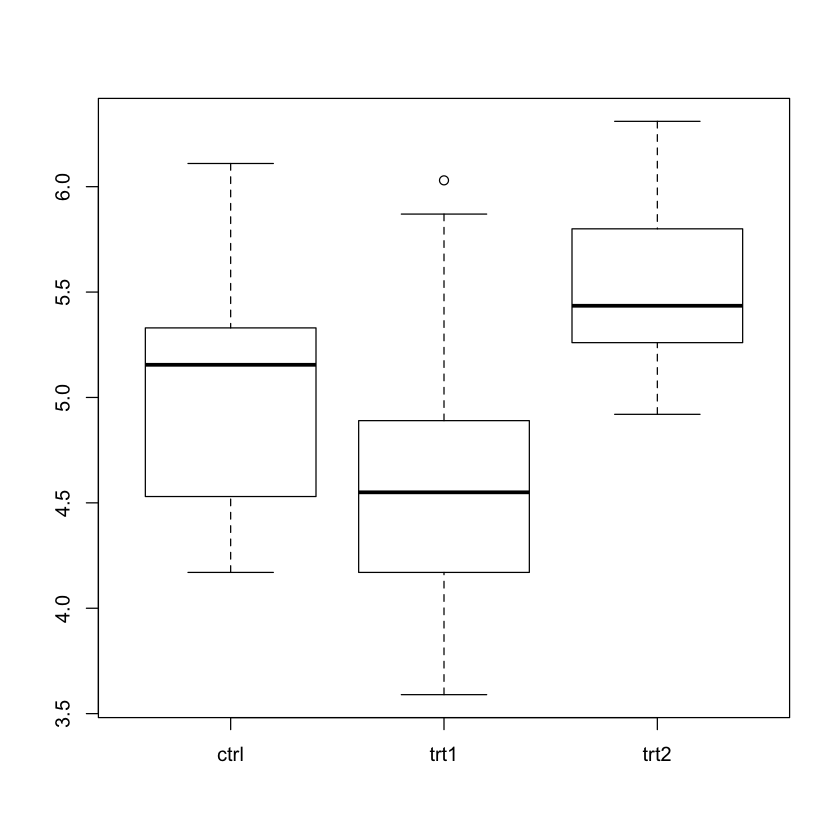

In [55]:
#Because the explanatory variable group is a factor and not continuous, we choose to visualize the data with box plots rather than scatter plots.
boxplot(weight ~ group, data=PlantGrowth)

- 박스 플롯은 세 그룹 각각에 대한 데이터 분포를 요약합니다. 
- 치료 2가 가장 높은 평균 수확량을 갖는 것으로 보인다. 각 그룹의 분산이 동일한 지 여부는 의심 스러울 지 모르지만 그 경우라고 가정합니다.

### Modeling
- Again, we can start with the reference analysis (with a noninformative prior) with a linear model in R.

In [56]:
lmod = lm(weight ~ group, data=PlantGrowth)
summary(lmod)


Call:
lm(formula = weight ~ group, data = PlantGrowth)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0710 -0.4180 -0.0060  0.2627  1.3690 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.0320     0.1971  25.527   <2e-16 ***
grouptrt1    -0.3710     0.2788  -1.331   0.1944    
grouptrt2     0.4940     0.2788   1.772   0.0877 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6234 on 27 degrees of freedom
Multiple R-squared:  0.2641,	Adjusted R-squared:  0.2096 
F-statistic: 4.846 on 2 and 27 DF,  p-value: 0.01591


In [57]:
anova(lmod)

Df Sum Sq   Mean Sq   F value  Pr(>F)    
group      2  3.76634 1.8831700 4.846088 0.01590996
Residuals 27 10.49209 0.3885959       NA         NA

In [59]:
#plot(lmod) # for graphical residual analysis

- R의 기본 모델 구조는 더미 표시기 변수가있는 선형 모델입니다. 
- 따라서 이 모형에서의 "절편"은 대조군에 대한 평균 산출량이다. 두 가지 다른 변수는 치료 1과 2의 예상 효과입니다. 치료 그룹 1의 평균 수확량을 회복하려면 절편과 치료 효과를 추가하십시오.
- R이 모델을 어떻게 설정하는지 보려면 model.matrix (lmod) 함수를 사용하여 X 행렬을 추출하십시오.

- R의 anova () 함수는 치료 그룹 내 관찰의 다양성을 치료 그룹 내 변동성과 비교하여 모든 수단이 동등한 지 또는 적어도 하나가 다른지를 테스트합니다. 여기서 작은 p 값은 평균이 모두 같지 않다는 것을 의미합니다.

- JAGS에 셀 평균 모델을 적합하게합시다.

In [60]:
library("rjags")

In [18]:
mod_string = " model {
    for (i in 1:length(y)) {
        y[i] ~ dnorm(mu[grp[i]], prec)
    }
    
    for (j in 1:3) {
        mu[j] ~ dnorm(0.0, 1.0/1.0e6)
    }
    
    prec ~ dgamma(5/2.0, 5*1.0/2.0)
    sig = sqrt( 1.0 / prec )
} "

set.seed(82)
str(PlantGrowth)
data_jags = list(y=PlantGrowth$weight, 
              grp=as.numeric(PlantGrowth$group))

params = c("mu", "sig")

inits = function() {
    inits = list("mu"=rnorm(3,0.0,100.0), "prec"=rgamma(1,1.0,1.0))
}

mod = jags.model(textConnection(mod_string), data=data_jags, inits=inits, n.chains=3)
update(mod, 1e3)

mod_sim = coda.samples(model=mod,
                        variable.names=params,
                        n.iter=5e3)
mod_csim = as.mcmc(do.call(rbind, mod_sim)) # combined chains

'data.frame':	30 obs. of  2 variables:
 $ weight: num  4.17 5.58 5.18 6.11 4.5 4.61 5.17 4.53 5.33 5.14 ...
 $ group : Factor w/ 3 levels "ctrl","trt1",..: 1 1 1 1 1 1 1 1 1 1 ...
Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 30
   Unobserved stochastic nodes: 4
   Total graph size: 85

Initializing model



In [19]:
head(mod_csim)

Markov Chain Monte Carlo (MCMC) output:
Start = 1 
End = 7 
Thinning interval = 1 
        mu[1]    mu[2]    mu[3]       sig
[1,] 4.761444 4.728936 5.423744 0.6604459
[2,] 4.969845 4.721862 5.497371 0.7368470
[3,] 4.823989 4.496857 5.737245 0.6698548
[4,] 5.052052 4.537926 5.591691 0.7223783
[5,] 4.567836 4.683565 5.420313 0.6610350
[6,] 4.729178 4.602952 5.311138 0.7526303
[7,] 5.045520 4.733658 5.455694 0.6480372

In [20]:
dim(mod_csim)

[1] 15000     4

### Model checking
- As usual, we check for convergence of our MCMC.

Potential scale reduction factors:

      Point est. Upper C.I.
mu[1]          1          1
mu[2]          1          1
mu[3]          1          1
sig            1          1

Multivariate psrf

1

mu[1]        mu[2]        mu[3]        sig         
Lag 0   1.000000000  1.000000000  1.000000000  1.000000000
Lag 1   0.014731431 -0.018700848  0.016925051  0.100123610
Lag 5  -0.010901129  0.004717316 -0.002936546 -0.005981588
Lag 10 -0.012405836 -0.003365979 -0.008691848 -0.002415438
Lag 50 -0.004753772 -0.003599661 -0.007199681 -0.001660503

mu[1]    mu[2]    mu[3]      sig 
15373.28 15431.23 14771.49 12759.25

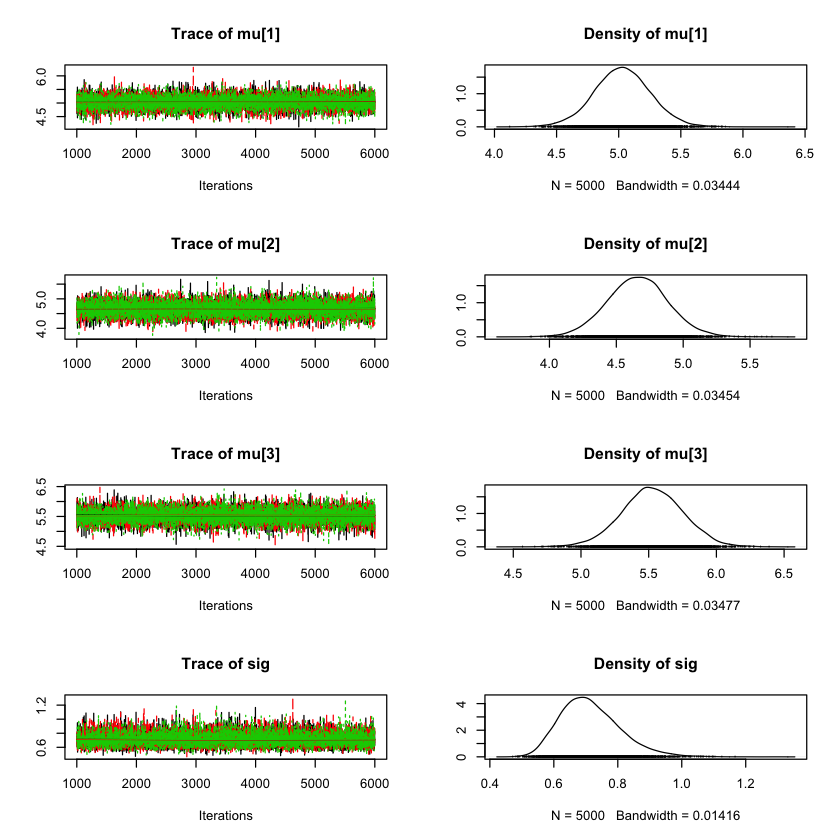

In [24]:
plot(mod_sim)

gelman.diag(mod_sim)
autocorr.diag(mod_sim)
effectiveSize(mod_sim)

- 잔차를 살펴봄으로써 모델 선택에 분명한 문제가 있는지 확인할 수 있습니다.

In [65]:
(pm_params = colMeans(mod_csim))

mu[1]     mu[2]     mu[3]       sig 
5.0301997 4.6621439 5.5259604 0.7111691

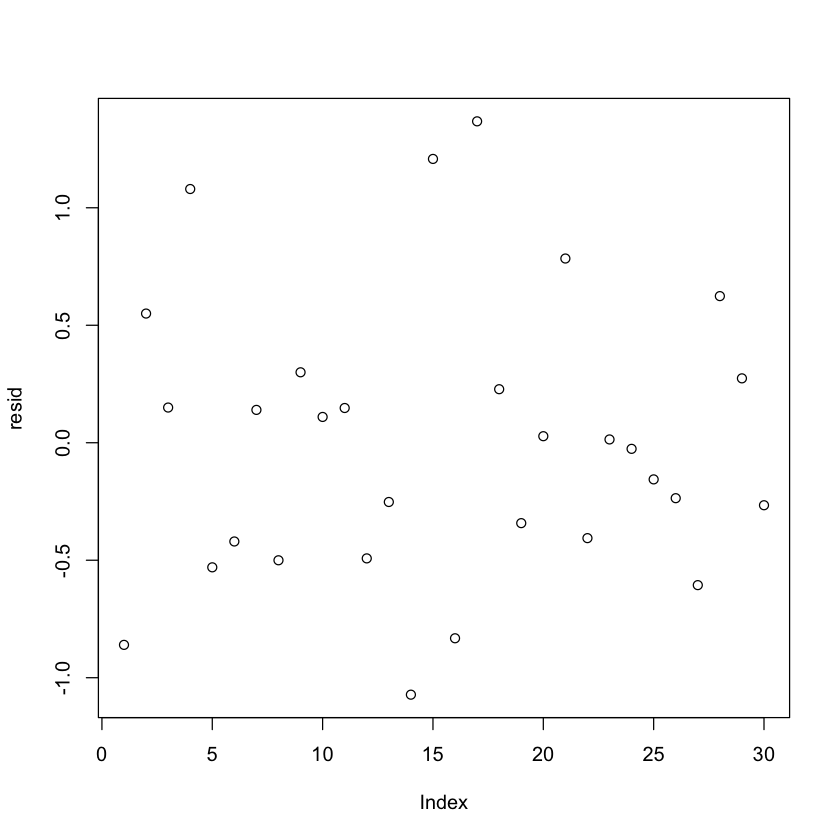

In [66]:
yhat = pm_params[1:3][data_jags$grp]
resid = data_jags$y - yhat
plot(resid)

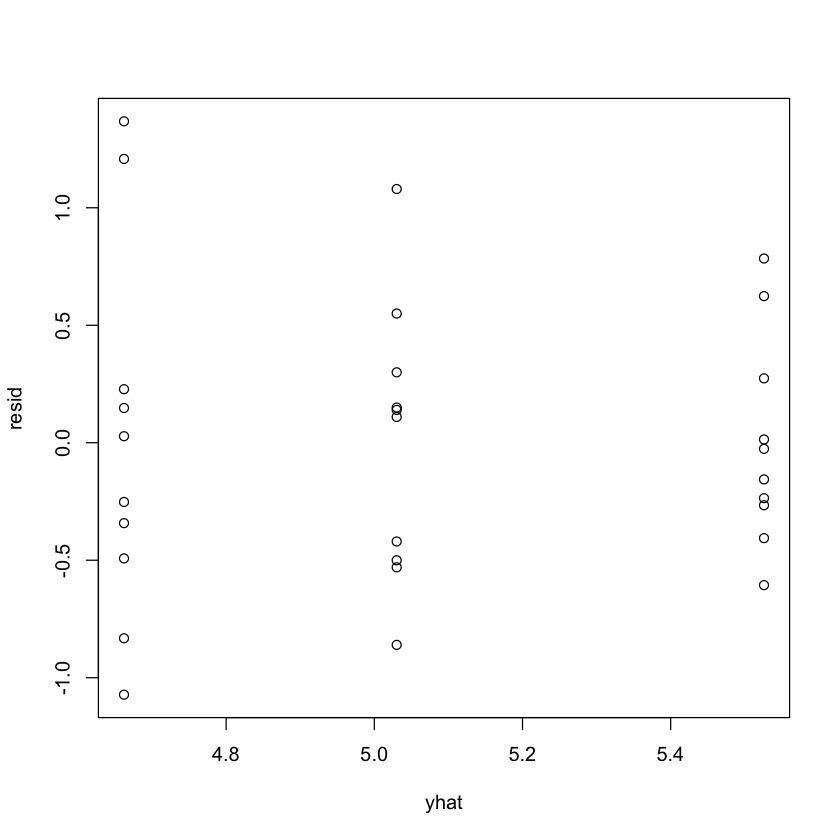

In [67]:
plot(yhat, resid)

- Again, it might be appropriate to have a separate variance for each group. We will have you do that as an exercise.

### Results
- Let’s look at the posterior summary of the parameters.

In [68]:
summary(mod_sim)


Iterations = 1001:6000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

        Mean      SD  Naive SE Time-series SE
mu[1] 5.0302 0.22516 0.0018385      0.0018141
mu[2] 4.6621 0.22743 0.0018569      0.0018650
mu[3] 5.5260 0.22574 0.0018431      0.0018689
sig   0.7112 0.09192 0.0007505      0.0008232

2. Quantiles for each variable:

        2.5%    25%    50%    75%  97.5%
mu[1] 4.5851 4.8813 5.0312 5.1774 5.4721
mu[2] 4.2161 4.5093 4.6624 4.8131 5.1140
mu[3] 5.0829 5.3774 5.5258 5.6752 5.9737
sig   0.5584 0.6456 0.7016 0.7669 0.9156


In [69]:
HPDinterval(mod_csim)

lower     upper    
mu[1] 4.5798601 5.4651952
mu[2] 4.2115667 5.1064942
mu[3] 5.0863906 5.9764259
sig   0.5499388 0.9013817

- The HPDinterval() function in the coda package calculates intervals of highest posterior density for each parameter.

- We are interested to know if one of the treatments increases mean yield. It is clear that treatment 1 does not. What about treatment 2?

In [70]:
mean(mod_csim[,3] > mod_csim[,1])

[1] 0.9416

- 치료 2의 평균 수확량이 대조군의 평균 수확량보다 큰 높은 사후 확률이있다.

- 치료 2가 생산에 투입되는 데는 많은 비용이 소요될 수 있습니다. 
- 가치가 있다고 가정하면,이 치료법은 평균 수확량을 10 % 증가시켜야합니다. 그 증가가 적어도 후사 확률은 얼마인가?

In [71]:
mean(mod_csim[,3] > 1.1*mod_csim[,1])

[1] 0.4940667

- 우리는 치료 2를 채택하면 평균 수확량이 적어도 10 % 증가 할 것이라는 확률이 약 50/50입니다.

### Introduction to logistic regression

- 회귀 분석에서 잔차 그림을 여기에 바로 그린다면, 확실히 정규 분포로 보이지 않을 것입니다.
- 일반적인 우도를 사용하는 대신 베르누이 가능성을 사용하는 것이 더 적절합니다. 즉, φi로 주어진 응답 yi는 베르누이 분포로부터 독립 할 것이다.
- 이렇게 이 모델의 한 가지 옵션은 이 선형 형식으로 phi를 직접 모델링하는 것, 그러나 phi는 확률을 나타내기 때문에 하나의 문제가 있습니다. 0과 1 사이에 위치해야합니다. 0과 1 사이에서 선형 형태를 유지하려면 베타 계수에 꽤 이상한 제한을 두어야합니다.
- 로지스틱 링크

![](img/week3_5.png)

### Data
- 로지스틱 회귀의 예를 들면 R의 부트 패키지에서 소변 데이터 세트를 사용할 것입니다. 응답 변수는 r이며 1 또는 0입니다. 값이 누락 된 데이터 세트에서 일부 행을 제거합니다.
- 분석의 목표는 소변의 물리적 특성이 칼슘 옥살산 염 결정의 형성과 관련이 있는지를 결정하는 것입니다.
- 목표변수 : 칼슘 옥살 레이트 결정의 존재를 나타내는 값은 0 또는 1이 될 것
- 설명 변수 또는 공변량은 pH 비 독성, 삼투압, 전도도, 요소 농도, 그리고 마지막으로 칼슘 농도

In [31]:
library("boot")
data("urine")
head(urine)
dim(urine)

r gravity ph   osmo cond urea calc
1 0 1.021   4.91 725    NA 443  2.45
2 0 1.017   5.74 577  20.0 296  4.49
3 0 1.008   7.20 321  14.9 101  2.36
4 0 1.011   5.51 408  12.6 224  2.15
5 0 1.005   6.52 187   7.5  91  1.16
6 0 1.020   5.27 668  25.3 252  3.34

[1] 79  7

In [32]:
dat = na.omit(urine)
dim(dat)

[1] 77  7

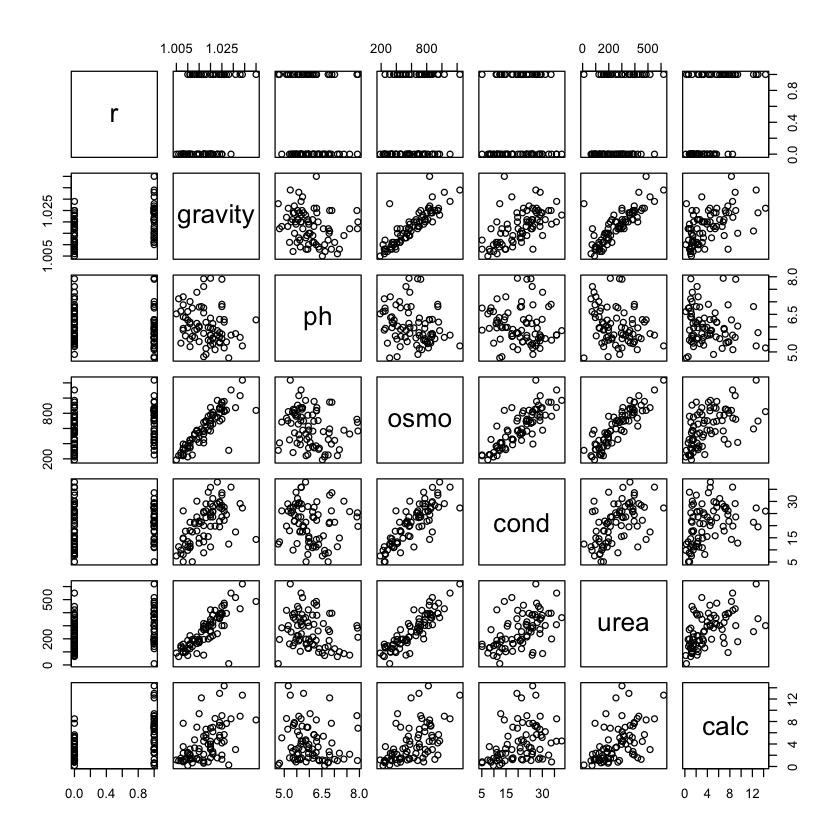

In [33]:
pairs(dat)

- 변수 중 몇 가지가 서로 밀접하게 관련되어 있다는 것입니다. 예를 들어, 중력(gravity과 삼투압(osmo)는 매우 밀접한 선형 관계를 가지고있는 것처럼 보입니다. 

- 선형 회귀 모델에서 x 변수 간의 공선성은 통계적 추론에 문제를 일으킬 수 있습니다. 상관 관계가 있는 두 변수는 반응 변수를 예측하는 능력에 대해 경쟁하게 되어 불안정한 추정치를 유도합니다. 

- 예측이 모델의 최종 목표 인 경우 응답 예측에 문제가 되지 않습니다. 그러나 변수가 응답과 어떻게 관련되는지를 발견하는 것이 우리의 목표라면 우리는 공선성을 피해야합니다.

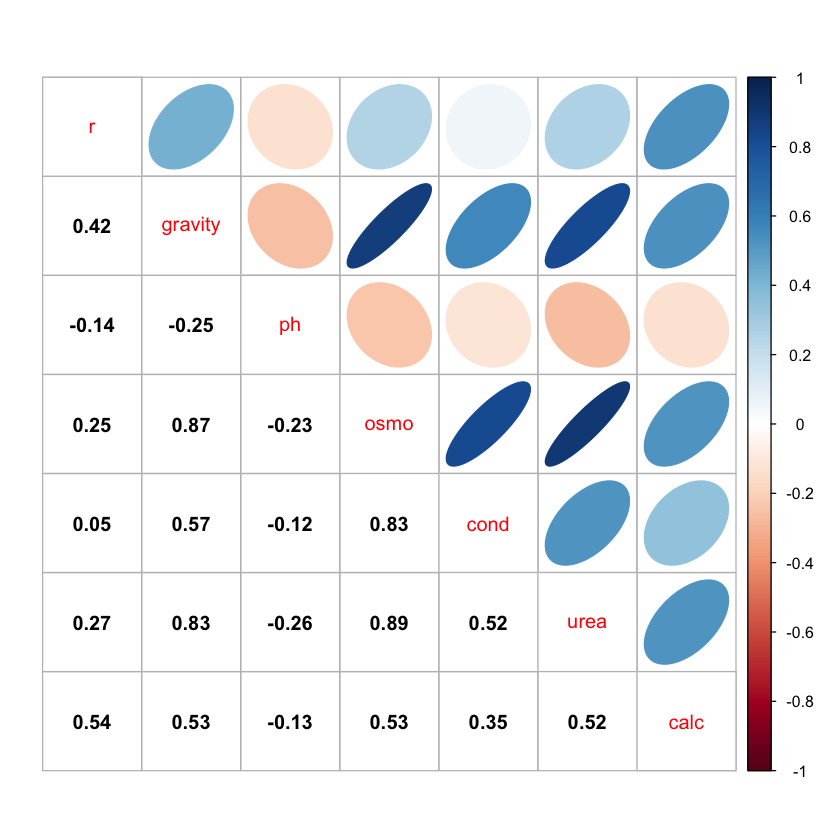

In [34]:
library("corrplot")
Cor = cor(dat)
corrplot(Cor, type="upper", method="ellipse", tl.pos="d")
corrplot(Cor, type="lower", method="number", col="black", 
         add=TRUE, diag=FALSE, tl.pos="n", cl.pos="n")

### Variable selection
- 분석의 주요 목표 중 하나는 칼슘 옥살산 염 결정의 존재와 관련된 변수를 찾는 것입니다. 
- 이 목표는 종종 "변수 선택"이라고 불립니다. 
- 우리는 이미 이 작업을 수행하는 한 가지 방법을 보았습니다. 여러 변수 집합을 포함하는 여러 모델에 적합하고 어느 것이 가장 좋은 DIC인지 확인하십시오. 이를 수행하는 또 다른 방법은 선형 계수를 사용하는 것입니다. 여기서 β 계수의 제수는 0에 가까운 값을 선호합니다 (약한 관계를 나타냄). 이렇게하면 협회 설립의 부담이 데이터와 관련됩니다. 강한 신호가 없다면 우리는 그것이 존재하지 않는다고 가정합니다.

- 척도에 기초한 각 개별 β에 대한 사전 조정보다는 평균을 빼고 각 변수에 대한 표준 편차로 나누는 것이 일반적입니다.

In [35]:
X = scale(dat[,-1], center=TRUE, scale=TRUE)
head(X[,"gravity"])

2          3          4          5          6          7 
-0.1403037 -1.3710690 -0.9608139 -1.7813240  0.2699514 -0.8240622

In [36]:
colMeans(X)

gravity            ph          osmo          cond          urea 
-9.861143e-15  8.511409e-17  1.515743e-16 -1.829852e-16  7.335402e-17 
         calc 
-1.689666e-18

In [37]:
apply(X, 2, sd)

gravity      ph    osmo    cond    urea    calc 
      1       1       1       1       1       1

### Model
- 이전에 우리가 모델에서 b라고 부르는 계수는 double exponential (또는 Laplace) 분포가 될 것인데, 이름에서 알 수 있듯이, 꼬리가 양의 방향과 음의 방향으로 확장되는 지수 분포 우리는 JAGS 매뉴얼에서 더 많은 것을 읽을 수있다. 배포본은 다음과 같습니다.

- Laplace distribution Probability density function
<img src ='https://wikimedia.org/api/rest_v1/media/math/render/svg/210306e18c75c252ce85eb79c3af18bb5c8dd1a8'>

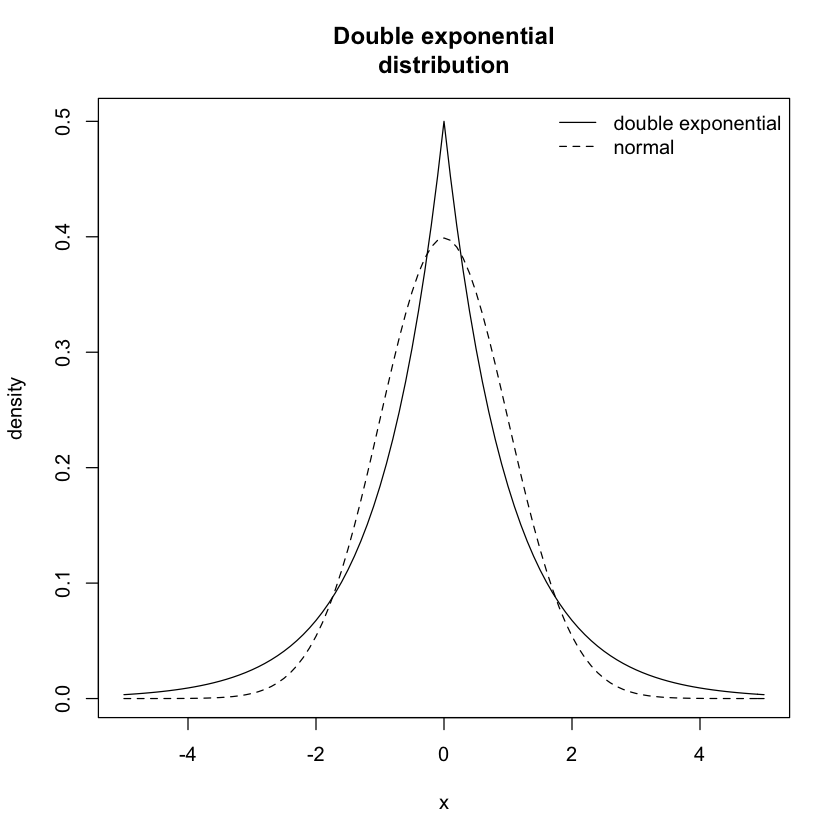

In [39]:
ddexp = function(x, mu, tau) {
  0.5*tau*exp(-tau*abs(x-mu)) 
}

curve(ddexp(x, mu=0.0, tau=1.0), from=-5.0, to=5.0, ylab="density", main="Double exponential\ndistribution") # double exponential distribution
curve(dnorm(x, mean=0.0, sd=1.0), from=-5.0, to=5.0, lty=2, add=TRUE) # normal distribution
legend("topright", legend=c("double exponential", "normal"), lty=c(1,2), bty="n")

In [1]:
library("rjags")
mod1_string = " model {
    for (i in 1:length(y)) {
        y[i] ~ dbern(p[i])
        logit(p[i]) = int + b[1]*gravity[i] + b[2]*ph[i] + b[3]*osmo[i] + b[4]*cond[i] + b[5]*urea[i] + b[6]*calc[i]
    }
    int ~ dnorm(0.0, 1.0/25.0)
    for (j in 1:6) {
        b[j] ~ ddexp(0.0, sqrt(2.0)) # has variance 1.0
    }
} "

Loading required package: coda
Linked to JAGS 4.2.0
Loaded modules: basemod,bugs


In [42]:
set.seed(92)
head(X)

gravity    ph         osmo       cond       urea        calc       
2 -0.1403037 -0.4163725 -0.1528785 -0.1130908  0.25747827  0.09997564
3 -1.3710690  1.6055972 -1.2218894 -0.7502609 -1.23693077 -0.54608444
4 -0.9608139 -0.7349020 -0.8585927 -1.0376121 -0.29430353 -0.60978050
5 -1.7813240  0.6638579 -1.7814497 -1.6747822 -1.31356713 -0.91006194
6  0.2699514 -1.0672806  0.2271214  0.5490664 -0.07972172 -0.24883614
7 -0.8240622 -0.5825618 -0.6372741 -0.4379226 -0.51654898 -0.83726644

In [43]:
data_jags = list(y=dat$r, gravity=X[,"gravity"], ph=X[,"ph"], osmo=X[,"osmo"], cond=X[,"cond"], urea=X[,"urea"], calc=X[,"calc"])

params = c("int", "b")

mod1 = jags.model(textConnection(mod1_string), data=data_jags, n.chains=3)
update(mod1, 1e3)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 77
   Unobserved stochastic nodes: 7
   Total graph size: 1096

Initializing model



In [44]:
mod1_sim = coda.samples(model=mod1,
                        variable.names=params,
                        n.iter=5e3)
mod1_csim = as.mcmc(do.call(rbind, mod1_sim))

In [45]:
head(mod1_csim)

Markov Chain Monte Carlo (MCMC) output:
Start = 1 
End = 7 
Thinning interval = 1 
          b[1]        b[2]       b[3]        b[4]        b[5]     b[6]
[1,] 0.9467074 -0.20260406 -1.0041115 -0.10703103  0.07265602 1.694745
[2,] 0.8639140 -0.26392198 -1.0696483  0.06641958  0.32162080 1.995956
[3,] 0.9122506 -0.27388523 -0.2187918 -0.33631860  0.24848322 1.068127
[4,] 1.0928972 -0.26147585 -0.6016126 -0.26797661 -0.21369912 1.555940
[5,] 0.4416298  0.13086986 -0.4719007 -0.27601168  0.20649471 1.807746
[6,] 1.1852830  0.02584256 -0.3718125 -0.52938345  0.36899172 1.299914
[7,] 1.3842081 -0.12558050 -0.1469473 -1.25336405  0.58641497 1.285370
            int
[1,]  0.1464892
[2,]  0.1393113
[3,]  0.2792905
[4,]  0.2952524
[5,] -0.0949430
[6,]  0.1249671
[7,] -0.4630647

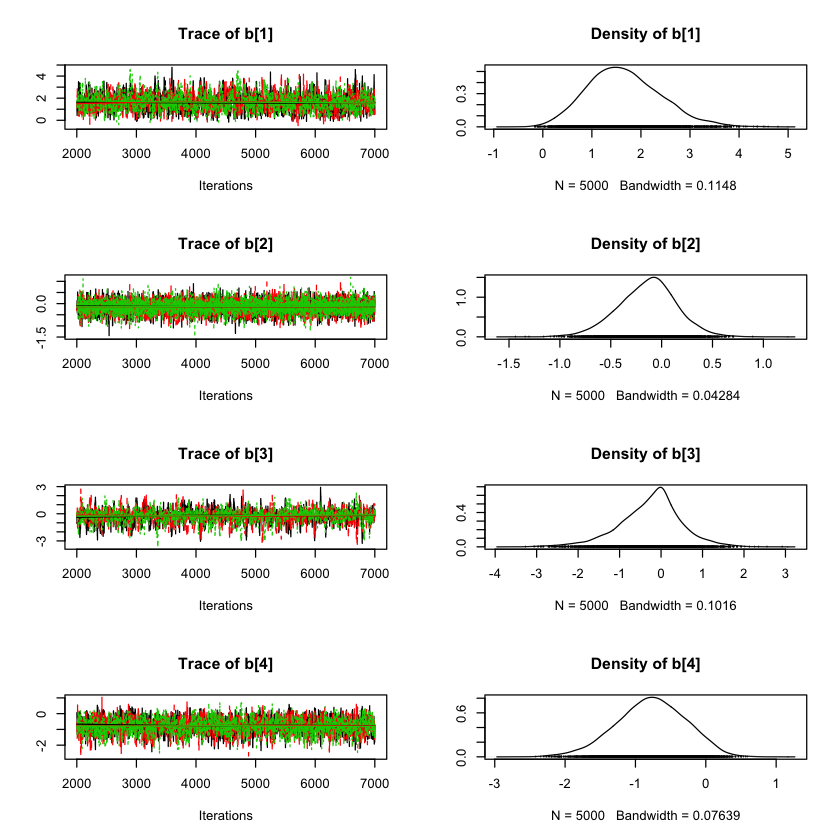

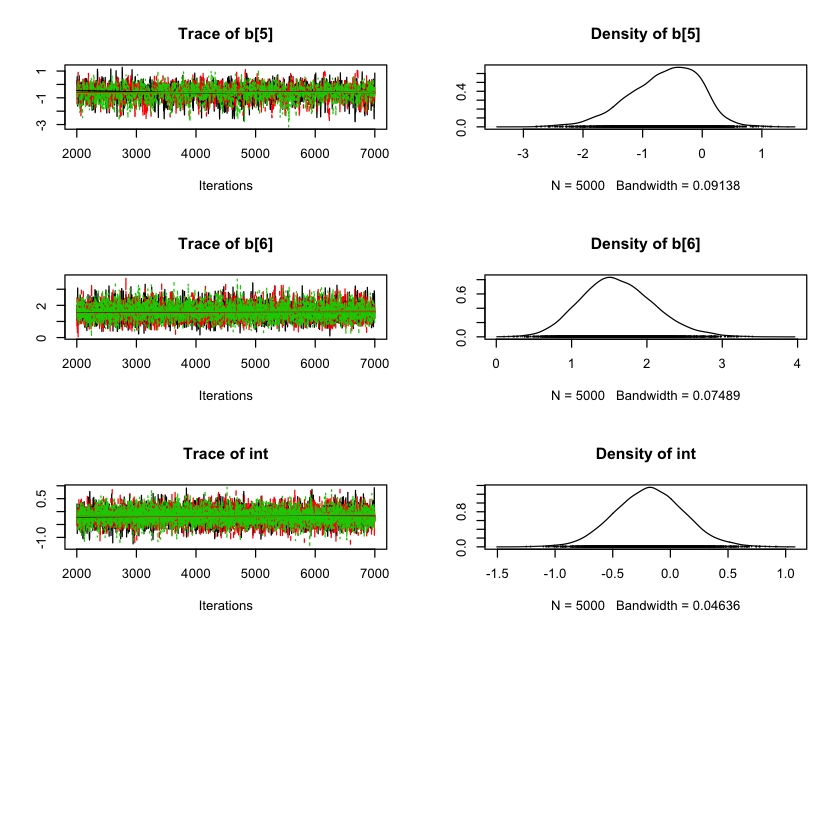

In [46]:
## convergence diagnostics
plot(mod1_sim, ask=TRUE)

In [47]:
gelman.diag(mod1_sim)

Potential scale reduction factors:

     Point est. Upper C.I.
b[1]          1       1.01
b[2]          1       1.00
b[3]          1       1.01
b[4]          1       1.00
b[5]          1       1.00
b[6]          1       1.00
int           1       1.00

Multivariate psrf

1

In [48]:
autocorr.diag(mod1_sim)

b[1]        b[2]         b[3]        b[4]         b[5]       
Lag 0  1.000000000  1.000000000  1.00000000  1.000000000  1.00000000
Lag 1  0.830651976  0.274609995  0.88791047  0.735478459  0.79126198
Lag 5  0.413308547 -0.002444848  0.54560368  0.307415723  0.36407374
Lag 10 0.181466972 -0.008353592  0.28978750  0.135352108  0.14232017
Lag 50 0.009323859  0.006772012 -0.01325001 -0.007589032 -0.03746921
       b[6]        int        
Lag 0   1.00000000 1.000000000
Lag 1   0.48462618 0.274363199
Lag 5   0.04495665 0.019109772
Lag 10  0.01260698 0.015600386
Lag 50 -0.01552624 0.004915336

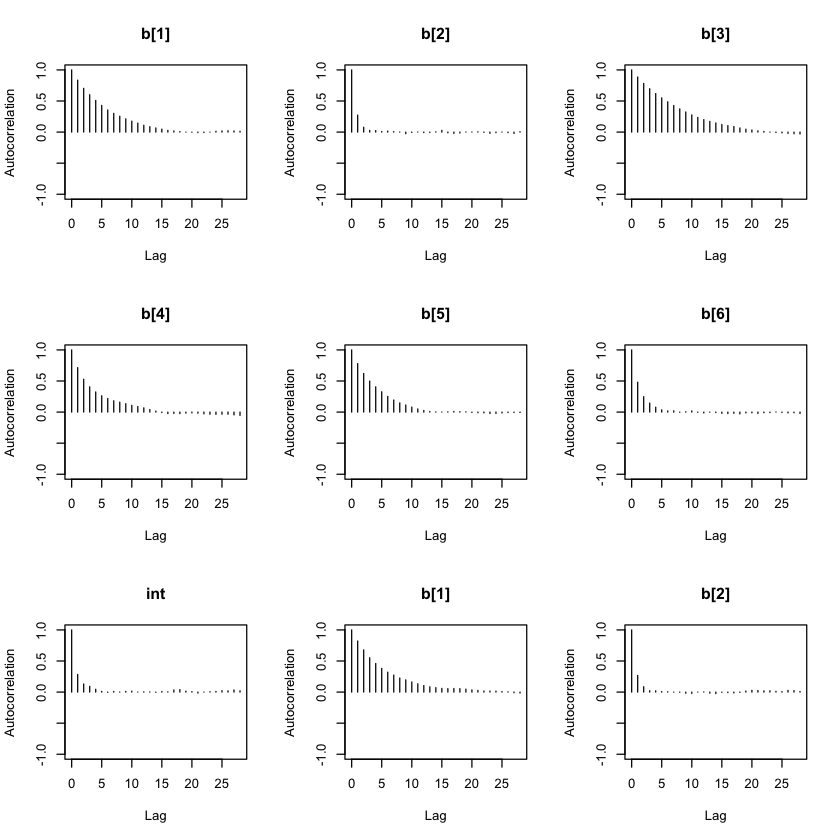

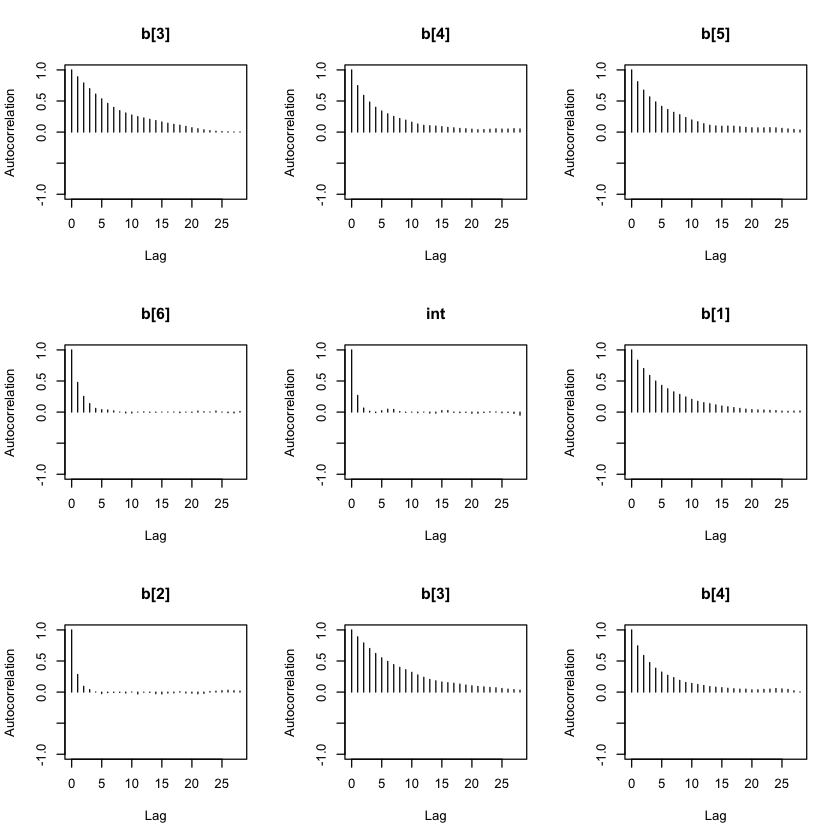

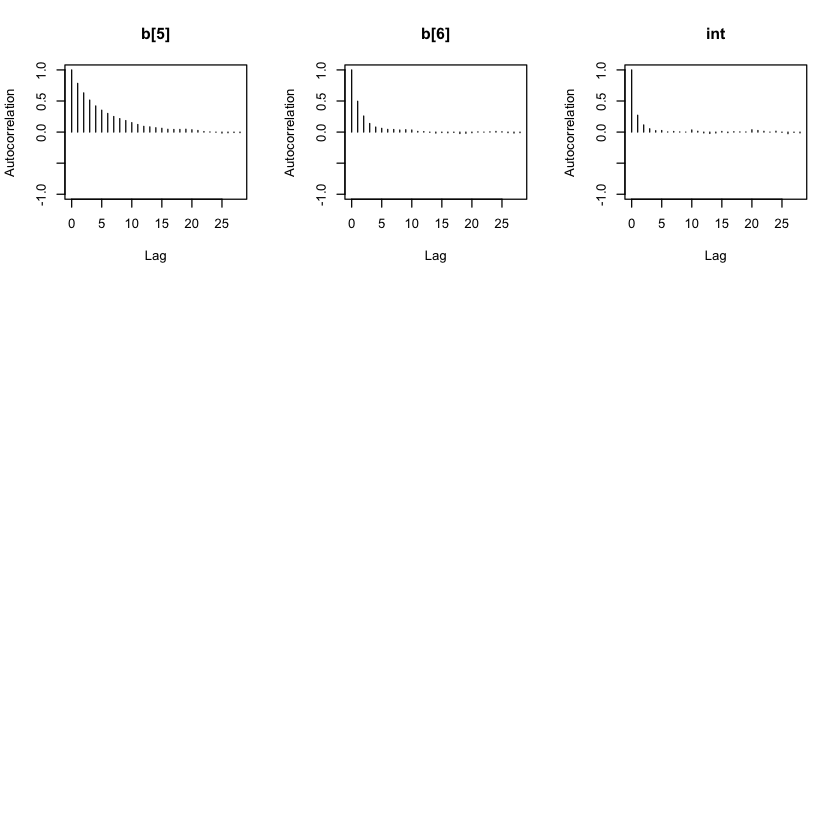

In [49]:
autocorr.plot(mod1_sim)

In [50]:
effectiveSize(mod1_sim)

b[1]     b[2]     b[3]     b[4]     b[5]     b[6]      int 
1331.746 8535.542  891.952 1771.847 1517.920 4942.483 7433.400

In [51]:
## calculate DIC
dic1 = dic.samples(mod1, n.iter=1e3)
dic1

Mean deviance:  68.52 
penalty 5.384 
Penalized deviance: 73.91 

In [52]:
summary(mod1_sim)


Iterations = 2001:7000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

        Mean     SD Naive SE Time-series SE
b[1]  1.6578 0.7413 0.006053       0.020359
b[2] -0.1409 0.2878 0.002350       0.003115
b[3] -0.2595 0.7574 0.006184       0.025357
b[4] -0.7779 0.4931 0.004027       0.011841
b[5] -0.6292 0.5899 0.004816       0.015373
b[6]  1.6124 0.4865 0.003972       0.006918
int  -0.1800 0.3017 0.002463       0.003504

2. Quantiles for each variable:

        2.5%     25%     50%      75%  97.5%
b[1]  0.3490  1.1304  1.6045  2.13554 3.2671
b[2] -0.7346 -0.3238 -0.1246  0.04669 0.4102
b[3] -1.9741 -0.6920 -0.1832  0.18711 1.2024
b[4] -1.8001 -1.1003 -0.7642 -0.43355 0.1254
b[5] -1.8986 -1.0166 -0.5674 -0.19359 0.3633
b[6]  0.7299  1.2757  1.5840  1.92351 2.6489
int  -0.7636 -0.3829 -0.1799  0.01811 0.4252


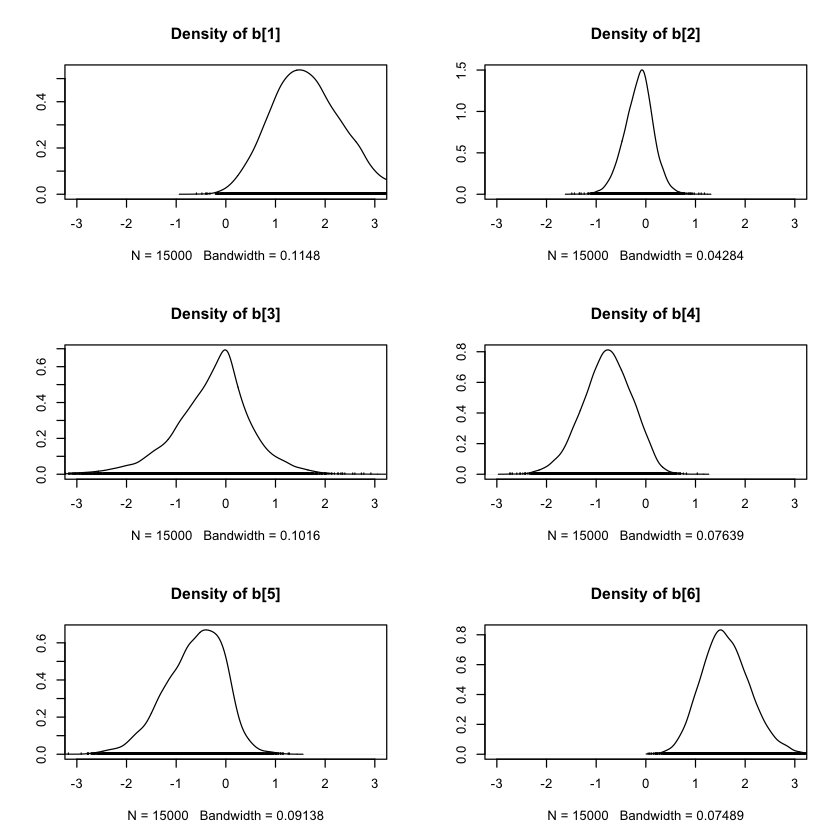

In [53]:
par(mfrow=c(3,2))
densplot(mod1_csim[,1:6], xlim=c(-3.0, 3.0))

- 이 그래프에서 우리가 찾고있는 첫 번째 점은 서로 다른 계수 인 베타가 0과 다르다는 증거입니다.
- 중력에 대한 계수 β1, 전도도 β4 여기 여기 칼슘 농도 β6 여기서 베타 3 개 모두는 0에서 상당히 떨어져 있음이 분명합니다.
- 여기서 ph, osmolarity(삼투압), cond(전도도)의 posterior 분포에 대한 계수는 우리의 double exponential prior와 유사하며 거의 0에 집중되어 있음을 주목하십시오.
- 따라서 우리는 삼투압이 칼슘 옥살산 염 결정의 강력한 예측 인자가 아니라는 결론을 내릴 것입니다. 여기 pH도 마찬가지입니다. 
- 우레아 농도 또는 베타 5는 경계선 인 것처럼 보입니다. 그러나 우리가 pairwise scatter plot을 참조한다면 우레아 농도는 gravity과 밀접하게 관련되어 있으므로이 변수를 제거 할 것입니다. 
- JAGS는 pH, 삼투압 및 우레아의 3 가지 변수를 사용하지 않을 것.

In [54]:
colnames(X) # variable names

[1] "gravity" "ph"      "osmo"    "cond"    "urea"    "calc"

- 변수 중력, cond (전도도) 및 calc (칼슘 농도)에 대한 계수는 0이 아닙니다. osmo (osmolarity) 계수에 대한 사후 분포는 이전처럼 보이며 거의 0을 중심으로합니다. 우리는 오스모가 칼슘 옥살산 염 결정의 강력한 예측 인자가 아니라고 결론 내릴 것입니다. ph도 마찬가지입니다.

- 우레아 (요소 농도)는 경계선 인 것으로 보인다. 그러나 변수 사이의 상관 관계를 다시 언급하면 우레아는 중력과 높은 상관 관계가 있다는 것을 알 수 있으므로 우레아는 중력과 상관 관계가 높습니다.

In [55]:
mod2_string = " model {
    for (i in 1:length(y)) {
        y[i] ~ dbern(p[i])
        logit(p[i]) = int + b[1]*gravity[i] + b[2]*cond[i] + b[3]*calc[i]
    }
    int ~ dnorm(0.0, 1.0/25.0)
    for (j in 1:3) {
        b[j] ~ dnorm(0.0, 1.0/25.0) # noninformative for logistic regression
    }
} "

mod2 = jags.model(textConnection(mod2_string), data=data_jags, n.chains=3)

Warning message in jags.model(textConnection(mod2_string), data = data_jags, n.chains = 3):
“Unused variable "ph" in data”Warning message in jags.model(textConnection(mod2_string), data = data_jags, n.chains = 3):
“Unused variable "osmo" in data”Warning message in jags.model(textConnection(mod2_string), data = data_jags, n.chains = 3):
“Unused variable "urea" in data”

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 77
   Unobserved stochastic nodes: 4
   Total graph size: 644

Initializing model



Potential scale reduction factors:

     Point est. Upper C.I.
b[1]          1          1
b[2]          1          1
b[3]          1          1
int           1          1

Multivariate psrf

1

b[1]        b[2]         b[3]         int         
Lag 0   1.00000000  1.000000000  1.000000000  1.000000000
Lag 1   0.58464295  0.671004807  0.505301631  0.271052086
Lag 5   0.09079362  0.152896344  0.062502652  0.007773133
Lag 10  0.01911655  0.012791334 -0.009908003  0.003650374
Lag 50 -0.02426955 -0.007798147 -0.006458107 -0.009965582

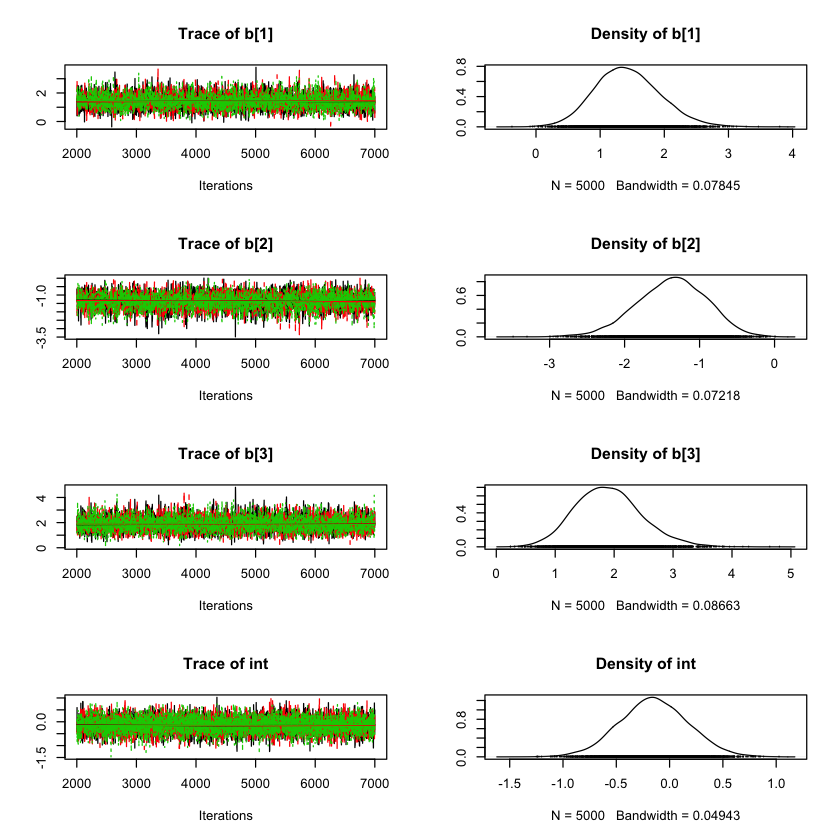

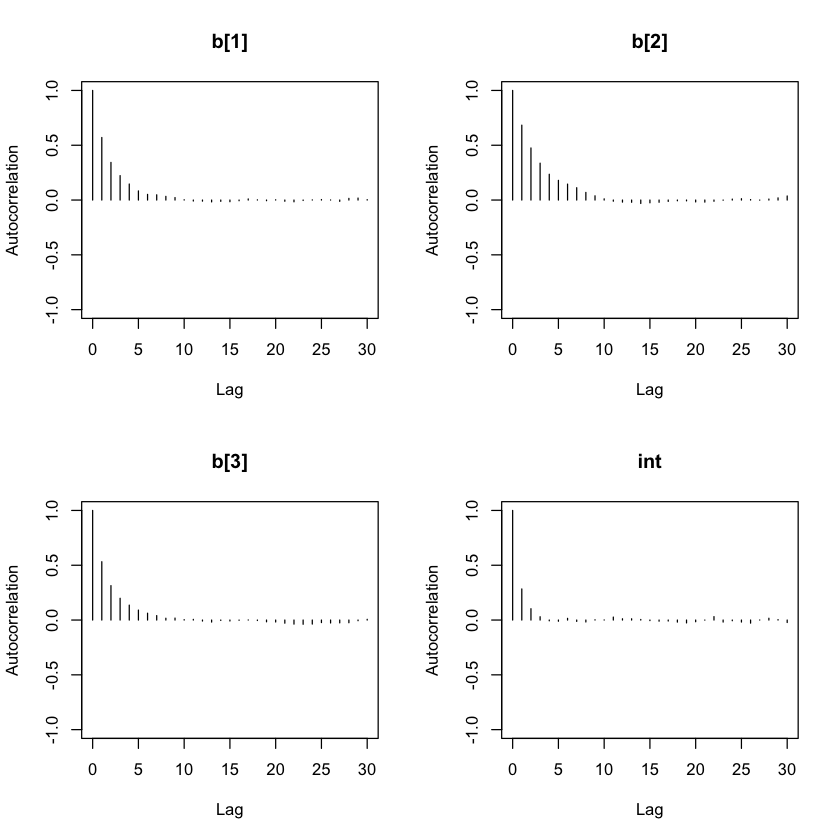

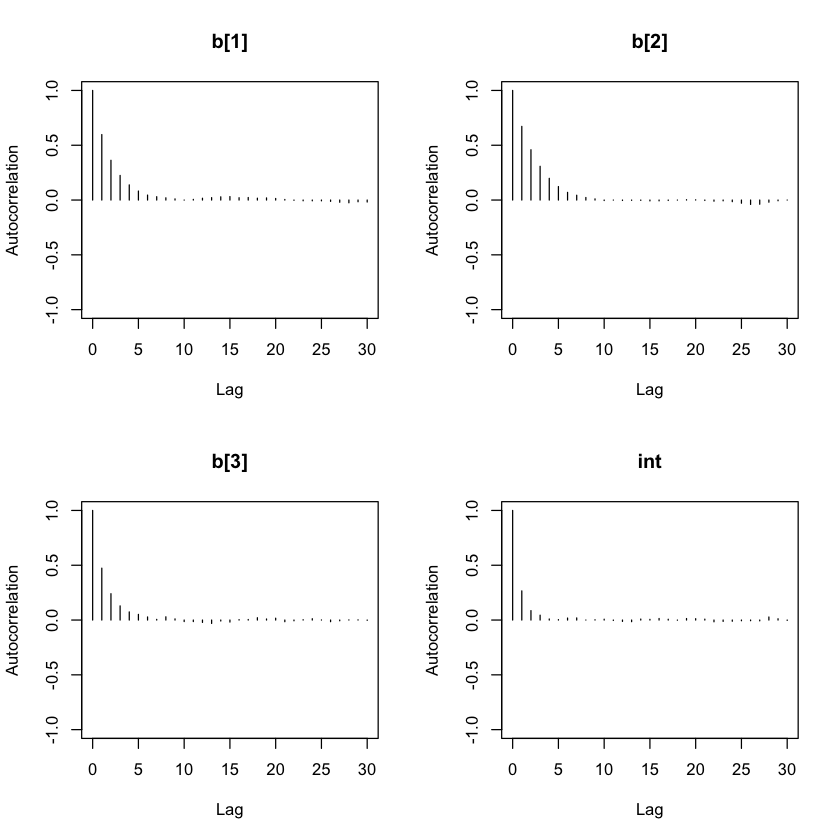

b[1]     b[2]     b[3]      int 
3630.422 2874.817 4593.059 8587.264

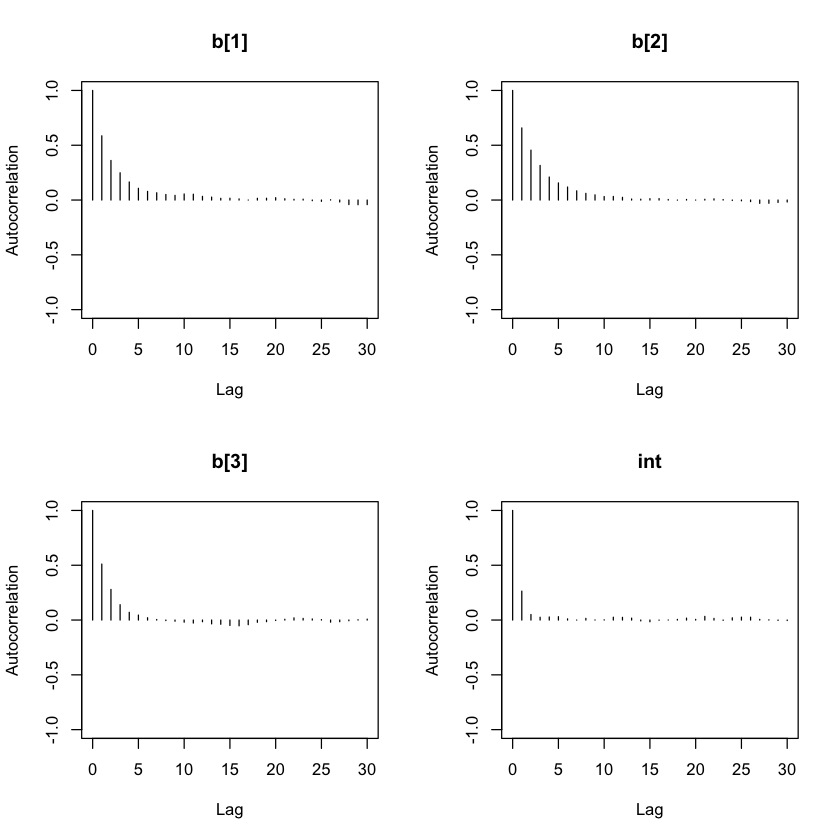

In [56]:
update(mod2, 1e3)

mod2_sim = coda.samples(model=mod2,
                        variable.names=params,
                        n.iter=5e3)
mod2_csim = as.mcmc(do.call(rbind, mod2_sim))

plot(mod2_sim, ask=TRUE)

gelman.diag(mod2_sim)
autocorr.diag(mod2_sim)
autocorr.plot(mod2_sim)
effectiveSize(mod2_sim)

dic2 = dic.samples(mod2, n.iter=1e3)

In [57]:
dic1

Mean deviance:  68.52 
penalty 5.384 
Penalized deviance: 73.91 

In [58]:
dic2

Mean deviance:  71.22 
penalty 4.004 
Penalized deviance: 75.22 

In [59]:
summary(mod2_sim)


Iterations = 2001:7000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

        Mean     SD Naive SE Time-series SE
b[1]  1.4296 0.5074 0.004143       0.008426
b[2] -1.3721 0.4659 0.003804       0.008691
b[3]  1.9029 0.5617 0.004586       0.008346
int  -0.1466 0.3227 0.002635       0.003486

2. Quantiles for each variable:

        2.5%    25%    50%      75%   97.5%
b[1]  0.4995  1.076  1.406  1.75441  2.4874
b[2] -2.3223 -1.679 -1.353 -1.04447 -0.5147
b[3]  0.8884  1.508  1.875  2.25747  3.1092
int  -0.7782 -0.360 -0.149  0.06755  0.4925


In [60]:
HPDinterval(mod2_csim)

lower      upper     
b[1]  0.4633252  2.4465931
b[2] -2.3270528 -0.5196997
b[3]  0.8500652  3.0617567
int  -0.7456246  0.5235446

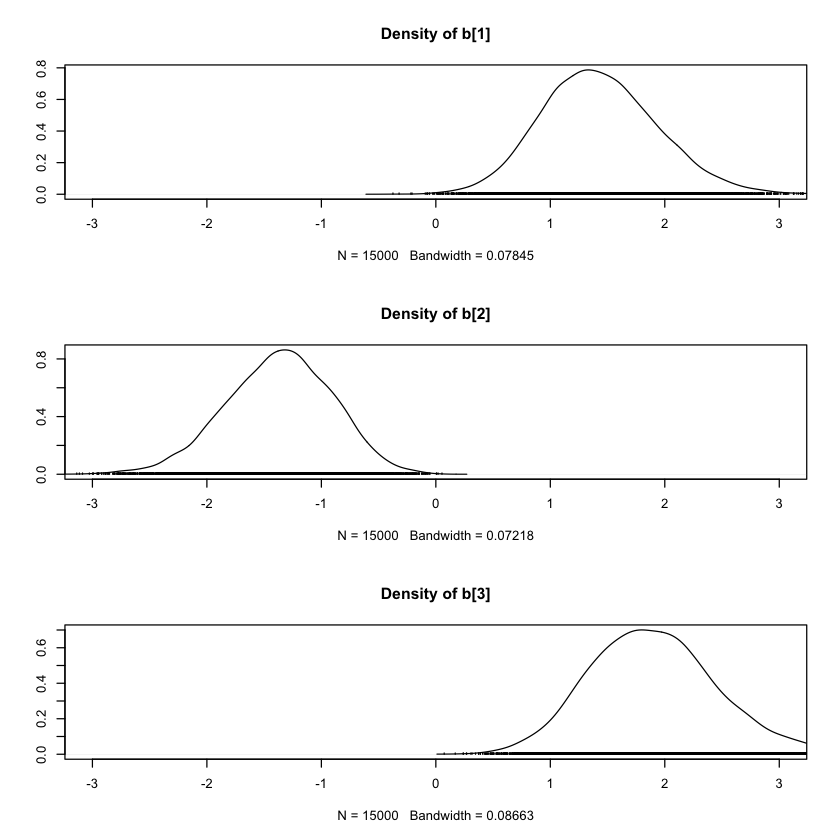

In [61]:
par(mfrow=c(3,1))
densplot(mod2_csim[,1:3], xlim=c(-3.0, 3.0))

In [62]:
colnames(X)[c(1,4,6)] # variable names

[1] "gravity" "cond"    "calc"

- 실제로 DIC는 첫 번째 모델에 더 좋습니다. 

- 우리는 모델 간의 이전 버전을 변경했으며 일반적으로 DIC를 사용하여 사전을 선택해서는 안된다는 점에 유의하십시오. 따라서이 두 모델 간의 DIC 비교는 공정한 비교가 아닐 수도 있습니다. 

- 그럼에도 불구하고 그들은 둘 다 본질적으로 같은 결론을 내린다. 중력과 calc (칼슘 농도) 값이 높을수록 옥살산 칼슘 결정의 확률이 높아지고 cond (전도도) 값이 높을수록 옥살산 칼슘 결정의 확률이 낮아집니다.

### Prediction from a logistic regression model

- 모델 매개 변수 추정치를 모델 예측치로 바꾸려면 어떻게 해야합니까? 열쇠는 모델의 형태입니다. 확률 p는 확률 p를 가진 1 인 베르누이임을 기억하십시오. 우리는 p의 로짓을 선형 모델로 모델링했습니다.이 수업의 첫 번째 세그먼트에서 보여 주었던 것은 E (y) = p (y)에 대한 지수 형태가 됩니다.

- 마지막 세그먼트에서 모델의 출력을 가져옵니다. 우리는 후미 평균을 매개 변수의 점 추정치로 사용할 것입니다.

In [63]:
(pm_coef = colMeans(mod2_csim))

b[1]       b[2]       b[3]        int 
 1.4296469 -1.3721140  1.9029371 -0.1465701

- 중력, cond, calc가 평균값에있을 때 수산 칼슘 결정의 확률에 대한 포인트 추정치는 1 / (1 + e - (- 0.15)) = 1 / (1 + e - (- 0.15)) = 0.4625702이다.


- 원래 x 변수 값의 관점에서 예측을하려면 다음 두 가지 옵션이 있습니다.
    - 각 x 변수에 대해 평균을 빼고 모델에 맞는 원래 데이터 세트의 해당 변수에 대한 표준 편차로 나눕니다.
    - 공변량을 중심에두고 크기를 조정하지 않고 모델을 다시 맞춥니 다.
   
### Predictive checks
- 동일한 아이디어를 사용하여 원본 데이터 포인트 각각에 대해 예측을 할 수 있습니다. 이것은 이전 모델의 잔차를 계산하기 위해 수행 한 것과 비슷합니다.

- 먼저 X 행렬을 취하고 행렬에 계수의 후부 평균을 곱합니다. 그런 다음 우리는 위에서 한 것처럼 링크 함수의 역함수를 통해 이러한 선형 값을 전달해야합니다.

In [64]:
pm_Xb = pm_coef["int"] + X[,c(1,4,6)] %*% pm_coef[1:3]
phat = 1.0 / (1.0 + exp(-pm_Xb))
head(phat)

[,1]      
2 0.49956650
3 0.10750962
4 0.22151724
5 0.10649699
6 0.27139903
7 0.08971877

- 이 phat 값은 각 데이터 포인트에 대한 칼슘 oxalate 결정의 모델 예측 확률입니다. 
- 예측 된 값을 실제 결과에 대입하여 모델이 얼마나 성공적인지 대략적으로 알 수 있습니다.

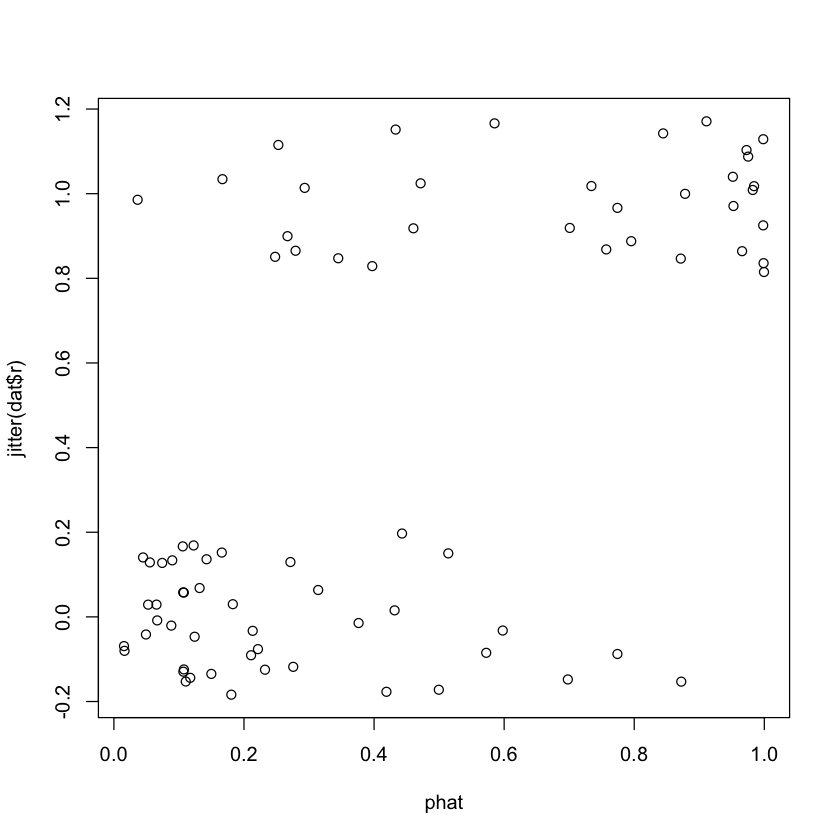

In [65]:
plot(phat, jitter(dat$r))

- 이 예측 확률에 대해 컷오프를 선택한다고 가정 해보십시오. 모델이 확률이 0.5보다 높다고 알면 관측치를 1로 분류하고 0.5보다 작 으면이를 0으로 분류합니다. 

- 그러면 모델이 각 데이터 요소를 분류합니다. 이제는 모델이 원본 데이터를 얼마나 잘 예측하는지 확인하기 위해 이러한 분류를 진리에 대해 요약 할 수 있습니다.

In [66]:
(tab0.5 = table(phat > 0.5, data_jags$y))

       
         0  1
  FALSE 38 12
  TRUE   6 21

In [67]:
sum(diag(tab0.5)) / sum(tab0.5)

[1] 0.7662338

- 올바른 분류 비율은 약 76 %로 나쁘지는 않지만 훌륭합니다.

- 데이터 요소를 1로 분류하기위한 기준을 낮추도록 선택할 수 있습니다. 0.3으로 변경한다고 가정 해보십시오. 즉, 모델이 확률이 0.3보다 크다면 우리는 이것을 칼슘 옥살 레이트 결정으로 분류 할 것입니다.

In [68]:
(tab0.3 = table(phat > 0.3, data_jags$y))

       
         0  1
  FALSE 32  7
  TRUE  12 26

In [69]:
sum(diag(tab0.3)) / sum(tab0.3)

[1] 0.7532468

- 0과 1 사이의 많은 임계 값에 대해이 연습을 반복 할 수 있으며 매번 오류율을 계산합니다. 이는 분류 기법을 평가하는 데 자주 사용되는 ROC (수신기 작동 특성) 곡선을 계산하는 것과 같습니다.

- 우리가 계산 한 이러한 분류 표는 모두 표본입니다. 그들은 모델에 맞는 동일한 데이터를 예측했습니다. 모델에 맞지 않는 데이터에 대해이 테이블을 계산하면 모델이 얼마나 잘 수행되는지보다 덜 편향된 평가를 얻을 수 있습니다. 예를 들어, 모델을 맞추기 전에 무작위로 선택된 "테스트"데이터 포인트 세트를 보류하고 나머지 "교육"데이터에 맞게 모델을 사용하여 "테스트"세트에 대한 예측을 할 수 있습니다.

### Two Factor ANOVA
- Let’s explore an example with two factors. We’ll use the Warpbreaks data set in R. 
- 데이터 세트는 직조기(배틀) 당 고정 길이의 울 실을 추출 할 때 해당하는 직조기 당(울의 종류, 텐션의 강약)에 따른 실의 끊긴 수를 제공합니다.
- breaks numeric 끊긴 수
- wool factor 양모의 종류 (A 또는 B)
- 장력 계수 장력 수준 (L, M, H)
- 6 종류의 경사 (AL, AM, AH, BL, BM, BH) 각각에 대해 9 개의 직기에 대한 측정이 있습니다.

<img src='http://dbscthumb.phinf.naver.net/1592_000_1/20130322234521518_S5OF014XZ.jpg/z1_1271_i1_org.jpg?type=m4500_4500_fst'>


In [2]:
data("warpbreaks")
#?warpbreaks
head(warpbreaks)

breaks wool tension
1 26     A    L      
2 30     A    L      
3 54     A    L      
4 25     A    L      
5 70     A    L      
6 52     A    L

In [3]:
table(warpbreaks$wool, warpbreaks$tension)

   
    L M H
  A 9 9 9
  B 9 9 9

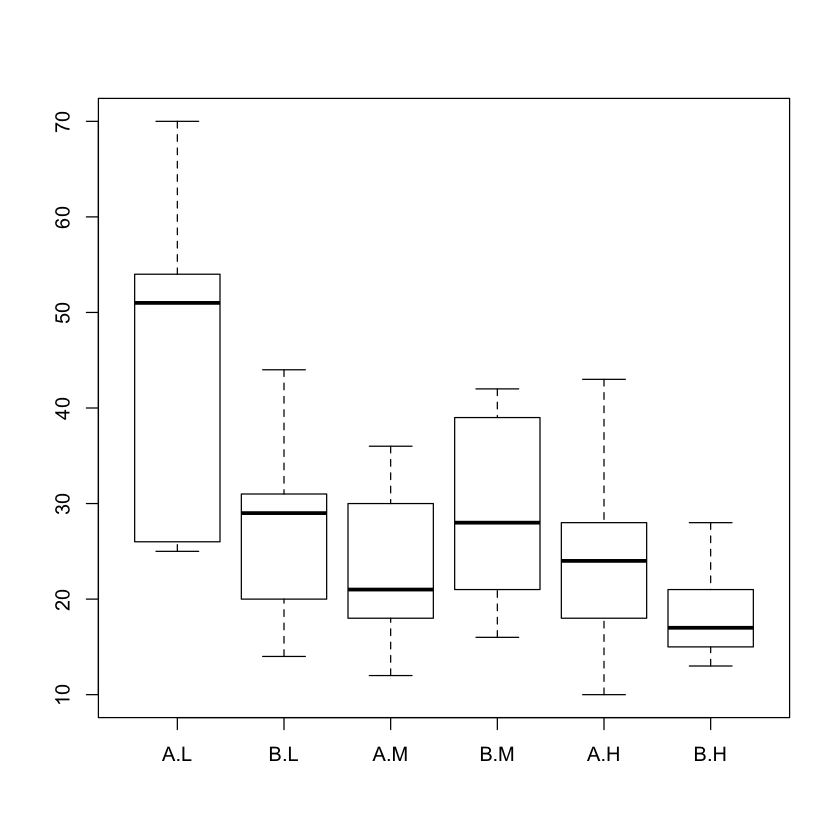

In [4]:
boxplot(breaks ~ wool + tension, data=warpbreaks)

- 다른 그룹은 나누기의 로그를 사용하면 더 유사한 분산을 갖습니다. 

- 이 시각화를 통해 두 요인 모두 휴식 횟수에 영향을 줄 수 있습니다. 

- 우리가 낮은 것에서 중간의 것에서 높은 tension으로 이동할 때 끊김의 일반적인 감소가 있는 것처럼 보입니다. tension만 사용하는 일방 통행 모델부터 시작합시다.


### One-way model


In [5]:
library("rjags")

mod1_string = " model {
    for( i in 1:length(y)) {
        y[i] ~ dnorm(mu[tensGrp[i]], prec)
    }
    
    for (j in 1:3) {
        mu[j] ~ dnorm(0.0, 1.0/1.0e6)
    }
    
    prec ~ dgamma(5/2.0, 5*2.0/2.0)
    sig = sqrt(1.0 / prec)
} "

set.seed(83)
str(warpbreaks)

'data.frame':	54 obs. of  3 variables:
 $ breaks : num  26 30 54 25 70 52 51 26 67 18 ...
 $ wool   : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ tension: Factor w/ 3 levels "L","M","H": 1 1 1 1 1 1 1 1 1 2 ...


In [6]:
data1_jags = list(y=log(warpbreaks$breaks), tensGrp=as.numeric(warpbreaks$tension))

params1 = c("mu", "sig")

mod1 = jags.model(textConnection(mod1_string), data=data1_jags, n.chains=3)
update(mod1, 1e3)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 54
   Unobserved stochastic nodes: 4
   Total graph size: 134

Initializing model



In [7]:
mod1_sim = coda.samples(model=mod1,
                        variable.names=params1,
                        n.iter=5e3)

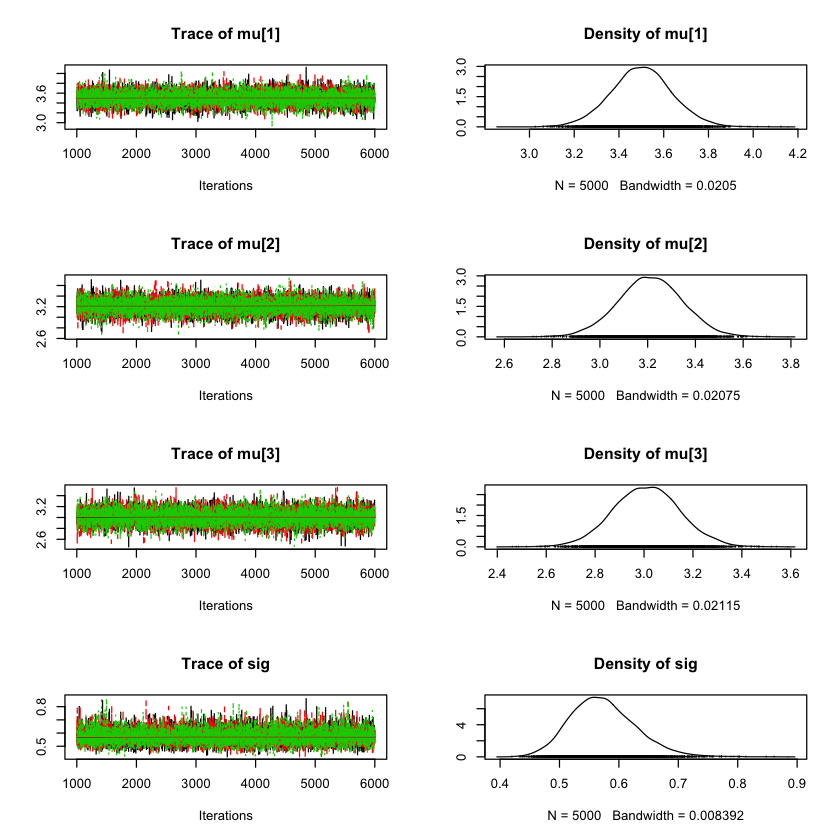

In [8]:
## convergence diagnostics
plot(mod1_sim)

In [9]:
gelman.diag(mod1_sim)
autocorr.diag(mod1_sim)
effectiveSize(mod1_sim)

Potential scale reduction factors:

      Point est. Upper C.I.
mu[1]          1          1
mu[2]          1          1
mu[3]          1          1
sig            1          1

Multivariate psrf

1

mu[1]        mu[2]       mu[3]        sig         
Lag 0   1.000000000  1.00000000  1.000000000  1.000000000
Lag 1   0.003599406  0.01057190  0.009597755  0.059277533
Lag 5  -0.015939690 -0.01270113  0.002059315  0.001596149
Lag 10  0.002391751 -0.01067854  0.003655131 -0.006642633
Lag 50 -0.006280540 -0.01207466 -0.012006469 -0.006054853

mu[1]    mu[2]    mu[3]      sig 
15260.17 15563.35 14781.80 13322.53

In [10]:
summary(mod1_sim)


Iterations = 1001:6000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

        Mean      SD  Naive SE Time-series SE
mu[1] 3.5009 0.13547 0.0011061       0.001097
mu[2] 3.2120 0.13472 0.0011000       0.001082
mu[3] 3.0101 0.13651 0.0011146       0.001123
sig   0.5735 0.05516 0.0004504       0.000478

2. Quantiles for each variable:

       2.5%    25%    50%    75%  97.5%
mu[1] 3.233 3.4117 3.5009 3.5891 3.7704
mu[2] 2.944 3.1226 3.2122 3.3021 3.4735
mu[3] 2.744 2.9180 3.0107 3.1015 3.2815
sig   0.477 0.5348 0.5695 0.6074 0.6929


- 2 군 (중간 tension)의 평균에 대한 95 % 후방 간격은 낮은 군과 높은 군과 중복되지만, 낮은 군과 높은 군의 간격은 약간 겹친다. 

- 그것은 낮은 강도와 높은 tension에 대한 수단이 다르다는 것을 보여주는 아주 강력한 표시입니다. 이 모델에 대한 DIC를 수집하고 양방향 모델로 이동합시다.

In [11]:
dic1 = dic.samples(mod1, n.iter=1e3)

### Two-way additive model
- 두 가지 요소 (하나는 2 단계, 다른 하나는 3 단계)에 대해 6 가지 치료 그룹이 있습니다.
- 이는 여러 요인 ANOVA를 도입 할 때 설명한 것과 동일한 상황입니다. 먼저 두 요소를 별도로 처리하는 additive 모델을 적용 할 것입니다.

In [12]:
X = model.matrix(lm(breaks ~ wool + tension, data=warpbreaks))
head(X)

(Intercept) woolB tensionM tensionH
1 1           0     0        0       
2 1           0     0        0       
3 1           0     0        0       
4 1           0     0        0       
5 1           0     0        0       
6 1           0     0        0

In [13]:
tail(X)

(Intercept) woolB tensionM tensionH
49 1           1     0        1       
50 1           1     0        1       
51 1           1     0        1       
52 1           1     0        1       
53 1           1     0        1       
54 1           1     0        1

- 기본적으로 R은 모직물 A의 평균값을 선택하고 저 장력 값은 절편 값으로 사용합니다. 

- 그런 다음 양모 B에 대한 효과와 중간 인장력 및 높은 장력에 대한 효과가 각각 더미 지표 변수와 관련됩니다.

In [14]:
mod2_string = " model {
    for( i in 1:length(y)) {
        y[i] ~ dnorm(mu[i], prec)
        mu[i] = int + alpha*isWoolB[i] + beta[1]*isTensionM[i] + beta[2]*isTensionH[i]
    }
    
    int ~ dnorm(0.0, 1.0/1.0e6)
    alpha ~ dnorm(0.0, 1.0/1.0e6)
    for (j in 1:2) {
        beta[j] ~ dnorm(0.0, 1.0/1.0e6)
    }
    
    prec ~ dgamma(3/2.0, 3*1.0/2.0)
    sig = sqrt(1.0 / prec)
} "

In [15]:
data2_jags = list(y=log(warpbreaks$breaks), isWoolB=X[,"woolB"], isTensionM=X[,"tensionM"], isTensionH=X[,"tensionH"])

params2 = c("int", "alpha", "beta", "sig")

mod2 = jags.model(textConnection(mod2_string), data=data2_jags, n.chains=3)
update(mod2, 1e3)

mod2_sim = coda.samples(model=mod2,
                        variable.names=params2,
                        n.iter=5e3)


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 54
   Unobserved stochastic nodes: 5
   Total graph size: 257

Initializing model



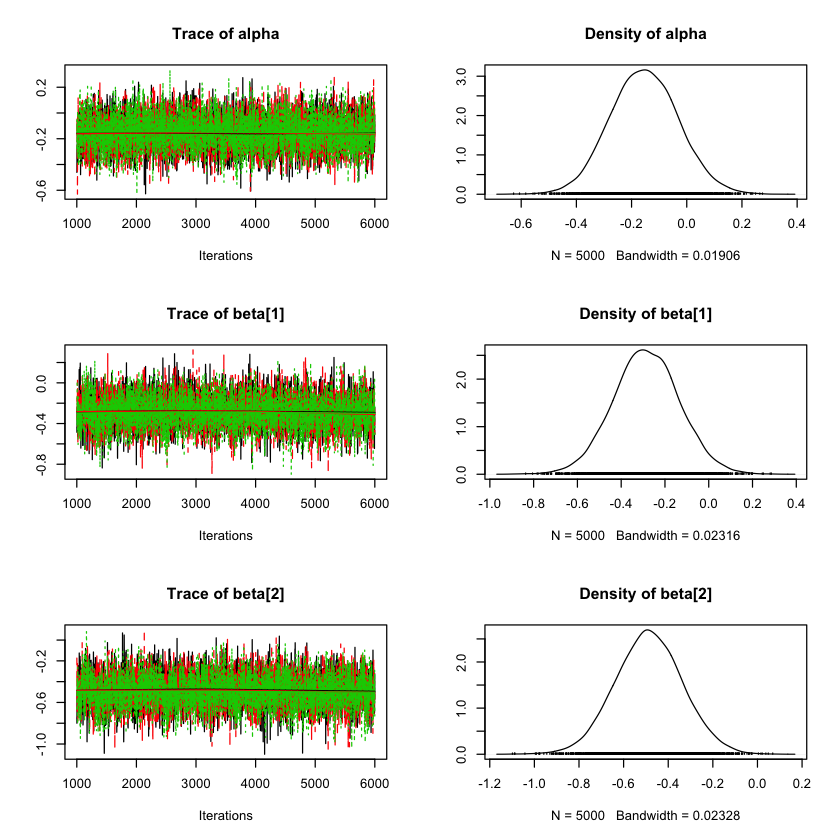

Potential scale reduction factors:

        Point est. Upper C.I.
alpha            1          1
beta[1]          1          1
beta[2]          1          1
int              1          1
sig              1          1

Multivariate psrf

1

alpha        beta[1]      beta[2]     int          sig         
Lag 0   1.000000000  1.000000000  1.00000000  1.000000000  1.000000000
Lag 1   0.480737153  0.499393396  0.49719211  0.744047966  0.065425534
Lag 5   0.027759449  0.098368293  0.08372813  0.163512704  0.007993780
Lag 10 -0.019298597  0.010380662  0.00870063  0.015100460 -0.002814890
Lag 50  0.002877846 -0.003076035 -0.00895905 -0.008009881  0.006807514

alpha   beta[1]   beta[2]       int       sig 
 5260.340  3747.071  3969.640  2629.753 12207.104

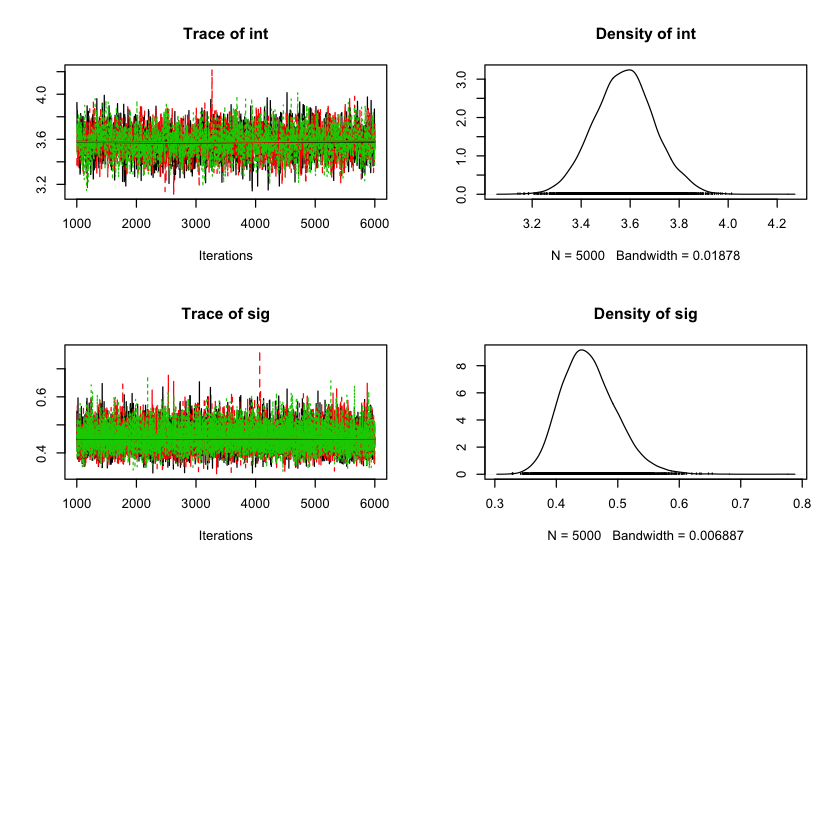

In [20]:
## convergene diagnostics
plot(mod2_sim)

gelman.diag(mod2_sim)
autocorr.diag(mod2_sim)
effectiveSize(mod2_sim)

In [86]:
summary(mod2_sim)


Iterations = 1001:6000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

           Mean      SD  Naive SE Time-series SE
alpha   -0.1477 0.12535 0.0010234      0.0017786
beta[1] -0.2852 0.15305 0.0012496      0.0024588
beta[2] -0.4868 0.15040 0.0012281      0.0024152
int      3.5716 0.12334 0.0010071      0.0024303
sig      0.4540 0.04565 0.0003728      0.0004083

2. Quantiles for each variable:

           2.5%     25%     50%     75%    97.5%
alpha   -0.3947 -0.2295 -0.1477 -0.0645  0.09982
beta[1] -0.5876 -0.3881 -0.2836 -0.1828  0.01340
beta[2] -0.7836 -0.5883 -0.4864 -0.3849 -0.19245
int      3.3292  3.4886  3.5712  3.6538  3.81715
sig      0.3756  0.4220  0.4502  0.4820  0.55462


In [87]:
(dic2 = dic.samples(mod2, n.iter=1e3))

Mean deviance:  55.49 
penalty 5.209 
Penalized deviance: 60.7 

In [89]:
dic1

Mean deviance:  66.44 
penalty 3.943 
Penalized deviance: 70.39 

- 이것은 모직 계수를 모델에 추가해야 할 것이 많이 있다는 것을 의미합니다. 
- 그러나 이 모델에 정착하기 전에 상호 작용이 있는지 고려해야합니다. 여섯 개의 치료 그룹 모두를 가진 상자 그림을 다시 살펴 보겠습니다.

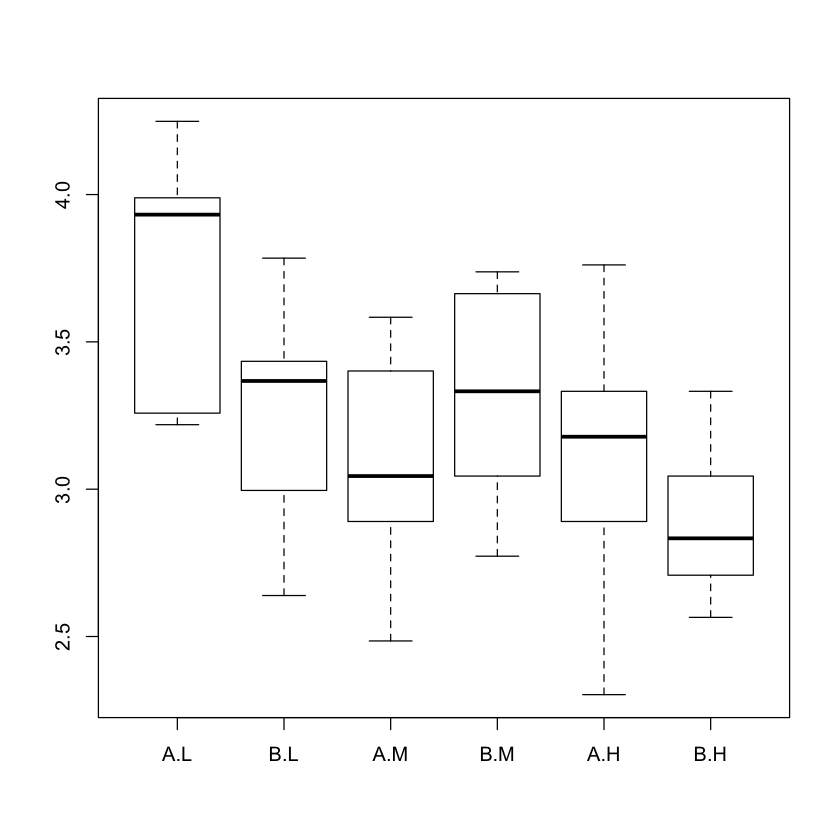

In [90]:
boxplot(log(breaks) ~ wool + tension, data=warpbreaks)

- 양방향 모델은 양모 B에 대해 단일 효과를 가지며 추정치는 음수입니다. 

- 이것이 사실이라면, 우리는 양모 B가 양모보다 더 적은 파손과 연관 될 것으로 기대할 것입니다. 

- 이것은 낮은 장력과 높은 장력에 해당되지만 중간 정도의 장력이있을 때 양모 B의 경우 끊기는 시간이 더 길어진 것처럼 보입니다. 

- 즉, 양모 B의 효과는 장력 수준에 따라 일정하지 않으므로 상호 작용 용어를 추가하는 것이 적절할 수 있습니다. R에서는 다음과 같이 보입니다.

In [16]:
lmod2 = lm(log(breaks) ~ .^2, data=warpbreaks)
summary(lmod2)


Call:
lm(formula = log(breaks) ~ .^2, data = warpbreaks)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81504 -0.27885  0.04042  0.27319  0.64358 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.7179     0.1247  29.824  < 2e-16 ***
woolB           -0.4356     0.1763  -2.471  0.01709 *  
tensionM        -0.6012     0.1763  -3.410  0.00133 ** 
tensionH        -0.6003     0.1763  -3.405  0.00134 ** 
woolB:tensionM   0.6281     0.2493   2.519  0.01514 *  
woolB:tensionH   0.2221     0.2493   0.891  0.37749    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.374 on 48 degrees of freedom
Multiple R-squared:  0.3363,	Adjusted R-squared:  0.2672 
F-statistic: 4.864 on 5 and 48 DF,  p-value: 0.001116


- 상호 작용을 추가하면 양모 B와 중간 tension에 효과가 있고 양모 B와 높은 tesion간에 효과가 있습니다. 

- 이제 평균에 대한 6 개의 매개 변수가 있으며 각 처리 그룹에 하나씩 있으므로이 모델은 전체 세포 평균 모델과 동일합니다. 그걸 사용합시다.

### Two-way cell means model

'data.frame':	54 obs. of  3 variables:
 $ breaks : num  26 30 54 25 70 52 51 26 67 18 ...
 $ wool   : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ tension: Factor w/ 3 levels "L","M","H": 1 1 1 1 1 1 1 1 1 2 ...
Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 54
   Unobserved stochastic nodes: 7
   Total graph size: 199

Initializing model



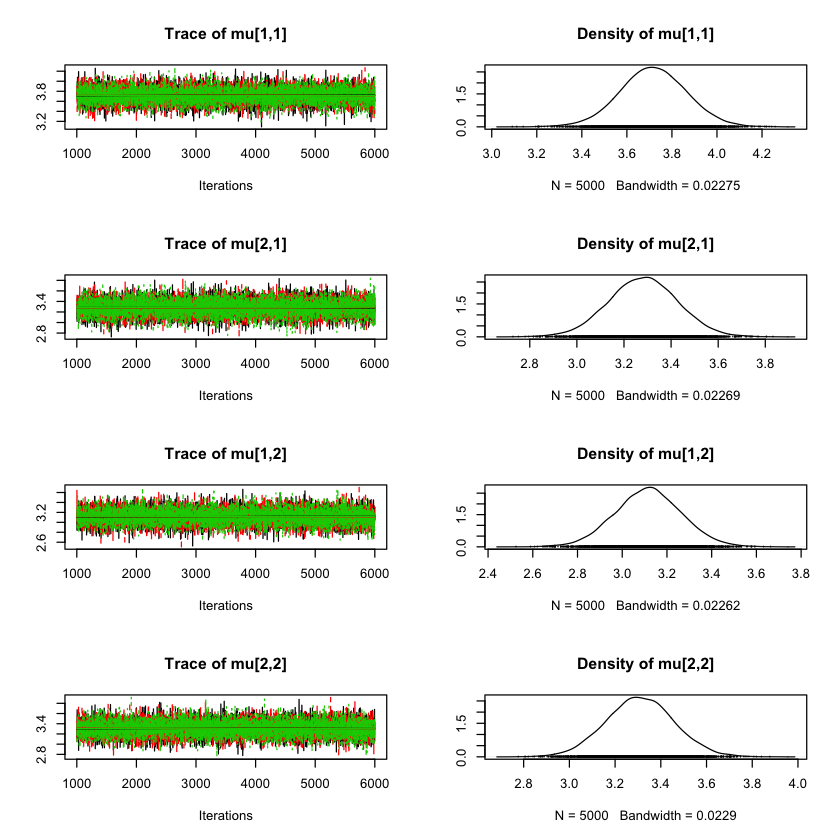

Potential scale reduction factors:

        Point est. Upper C.I.
mu[1,1]          1          1
mu[2,1]          1          1
mu[1,2]          1          1
mu[2,2]          1          1
mu[1,3]          1          1
mu[2,3]          1          1
sig              1          1

Multivariate psrf

1

mu[1,1]      mu[2,1]      mu[1,2]      mu[2,2]      mu[1,3]     
Lag 0   1.000000000  1.000000000  1.000000000  1.000000000  1.000000000
Lag 1  -0.009731745 -0.002845294  0.014111178 -0.006698640 -0.005850226
Lag 5  -0.010490770 -0.001290805  0.000527350 -0.014821979 -0.004167395
Lag 10 -0.001984524 -0.003014347  0.004186869 -0.003499849  0.009532024
Lag 50  0.002010768 -0.008657898 -0.005324216 -0.015538332 -0.003808682
       mu[2,3]       sig         
Lag 0   1.0000000000  1.000000000
Lag 1  -0.0003752941  0.108495021
Lag 5   0.0004414925 -0.011604237
Lag 10 -0.0187702126  0.009090880
Lag 50  0.0081491994  0.001241118

mu[1,1]  mu[2,1]  mu[1,2]  mu[2,2]  mu[1,3]  mu[2,3]      sig 
15000.00 14940.70 14667.36 15215.59 14903.45 15022.48 12348.17

[[1]]

Quantile (q) = 0.025
Accuracy (r) = +/- 0.005
Probability (s) = 0.95 
                                               
         Burn-in  Total Lower bound  Dependence
         (M)      (N)   (Nmin)       factor (I)
 mu[1,1] 2        3741  3746         0.999     
 mu[2,1] 2        3741  3746         0.999     
 mu[1,2] 2        3803  3746         1.020     
 mu[2,2] 2        3930  3746         1.050     
 mu[1,3] 2        3680  3746         0.982     
 mu[2,3] 2        3803  3746         1.020     
 sig     3        4129  3746         1.100     


[[2]]

Quantile (q) = 0.025
Accuracy (r) = +/- 0.005
Probability (s) = 0.95 
                                               
         Burn-in  Total Lower bound  Dependence
         (M)      (N)   (Nmin)       factor (I)
 mu[1,1] 2        3680  3746         0.982     
 mu[2,1] 2        3866  3746         1.030     
 mu[1,2] 2        3620  3746         0.966     
 mu[2,2] 2        3620  3746         0.966     
 mu[1,3] 2        3866  3746

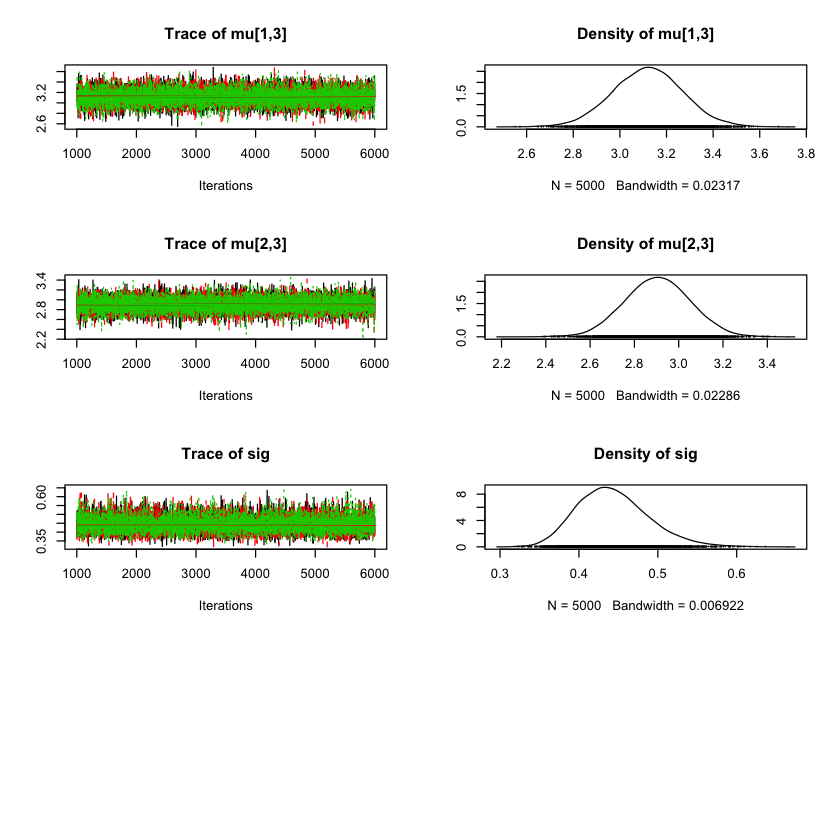

In [29]:
mod3_string = " model {
    for( i in 1:length(y)) {
        y[i] ~ dnorm(mu[woolGrp[i], tensGrp[i]], prec)
    }
    
    for (j in 1:max(woolGrp)) {
        for (k in 1:max(tensGrp)) {
            mu[j,k] ~ dnorm(0.0, 1.0/1.0e6)
        }
    }
    
    prec ~ dgamma(3/2.0, 3*1.0/2.0)
    sig = sqrt(1.0 / prec)
} "

str(warpbreaks)

data3_jags = list(y=log(warpbreaks$breaks), woolGrp=as.numeric(warpbreaks$wool), tensGrp=as.numeric(warpbreaks$tension))

params3 = c("mu", "sig")

mod3 = jags.model(textConnection(mod3_string), data=data3_jags, n.chains=3)
update(mod3, 1e3)

mod3_sim = coda.samples(model=mod3,
                        variable.names=params3,
                        n.iter=5e3)
mod3_csim = as.mcmc(do.call(rbind, mod3_sim))

plot(mod3_sim, ask=TRUE)

## convergence diagnostics
gelman.diag(mod3_sim)
autocorr.diag(mod3_sim)
effectiveSize(mod3_sim)
raftery.diag(mod3_sim)

In [30]:
(dic3 = dic.samples(mod3, n.iter=1e3))

Mean deviance:  52 
penalty 7.272 
Penalized deviance: 59.27 

In [94]:
dic2

Mean deviance:  55.49 
penalty 5.209 
Penalized deviance: 60.7 

In [95]:
dic1

Mean deviance:  66.44 
penalty 3.943 
Penalized deviance: 70.39 

In [96]:
summary(mod3_sim)


Iterations = 1001:6000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean      SD  Naive SE Time-series SE
mu[1,1] 3.7163 0.14949 0.0012206      0.0012106
mu[2,1] 3.2833 0.14857 0.0012131      0.0012215
mu[1,2] 3.1166 0.14998 0.0012245      0.0012245
mu[2,2] 3.3102 0.14871 0.0012142      0.0012143
mu[1,3] 3.1178 0.14803 0.0012087      0.0012190
mu[2,3] 2.9055 0.14945 0.0012203      0.0012203
sig     0.4432 0.04501 0.0003675      0.0004137

2. Quantiles for each variable:

          2.5%    25%    50%   75%  97.5%
mu[1,1] 3.4232 3.6170 3.7156 3.816 4.0079
mu[2,1] 2.9909 3.1848 3.2840 3.383 3.5715
mu[1,2] 2.8223 3.0174 3.1180 3.215 3.4094
mu[2,2] 3.0194 3.2104 3.3103 3.411 3.5976
mu[1,3] 2.8283 3.0197 3.1180 3.215 3.4091
mu[2,3] 2.6129 2.8062 2.9058 3.005 3.2002
sig     0.3661 0.4115 0.4398 0.470 0.5428


In [97]:
HPDinterval(mod3_csim)

lower     upper    
mu[1,1] 3.4307318 4.0153832
mu[2,1] 2.9973998 3.5775573
mu[1,2] 2.8265390 3.4123487
mu[2,2] 3.0279138 3.6041274
mu[1,3] 2.8250023 3.4045644
mu[2,3] 2.5993611 3.1843957
sig     0.3596985 0.5329694

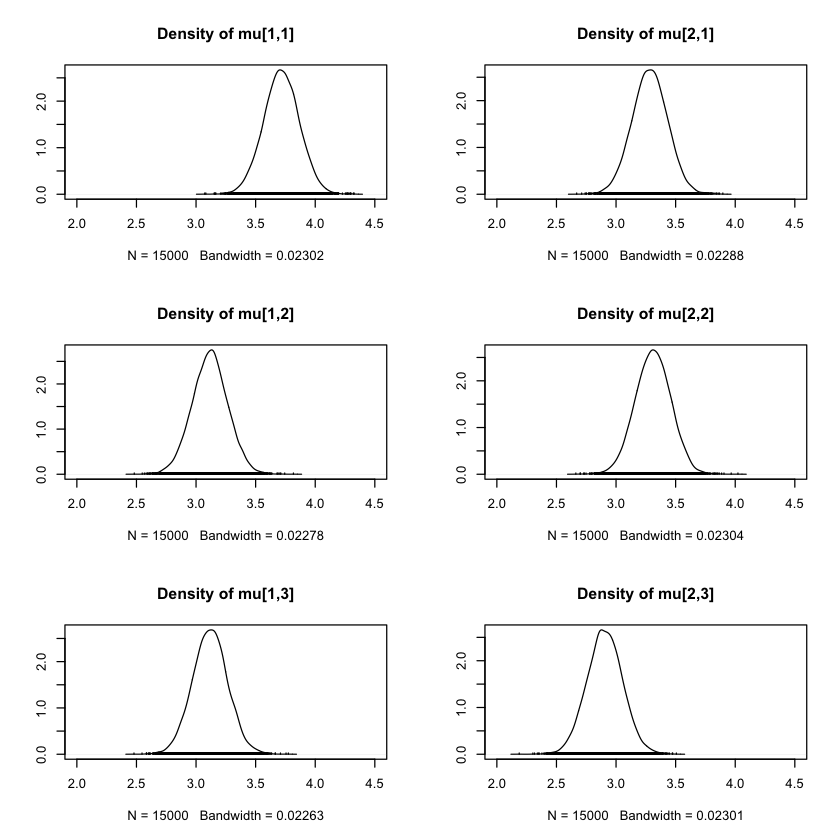

In [98]:
par(mfrow=c(3,2)) # arrange frame for plots
densplot(mod3_csim[,1:6], xlim=c(2.0, 4.5))

- 각 치료법의 조합을 비교하는 것이 유혹적 일지 모르지만, 이것이 위조 된 결과를 초래할 수 있다고 경고합니다.

- 우리가 통계적 모델링 주기를 논의했을 때 흥미로운 가설에 대한 결과를 검색하지 않는 것이 가장 좋다고 말했습니다. 왜냐하면 많은 가설이 있다면 우연히 단순히 "효과"또는 "연관성"을 나타내는 것처럼 보이기 때문입니다. 우리가 사전에 관심이있는 가설을 비교적 적은 수로 결정하고 데이터를 수집하고 그 증거를 통계적으로 평가할 때 결과는 가장 신뢰할 수 있습니다.

- 우리가 이러한 데이터에 관심을 갖는 질문 중 하나는 가장 적게 실이 끊기는 시간을 제공하는 치료법을 찾는 것입니다. 이것을 계산하기 위해 우리는 우리의 후부 표본을 통과 할 수 있고 각 표본에 대해 가장 작은 평균을 가진 그룹을 발견 할 수 있습니다. 이 수치는 각 치료군의 평균이 가장 작은 사후 확률을 결정하는 데 도움이됩니다.

In [102]:
prop.table( table( apply(mod3_csim[,1:6], 1, which.min) ) )


         2          3          4          5          6 
0.01666667 0.11960000 0.01240000 0.12006667 0.73126667 

- 증거는 가장 짧은 휴식을 주는 치료법으로 높은 긴장감을 지닌 양모 B를 지원합니다.

In [22]:
mod4_string = " model {
    for( i in 1:length(y)) {
        y[i] ~ dnorm(mu[i], prec)
        mu[i] = int + alpha*isWoolB[i] + beta[1]*isTensionM[i] + beta[2]*isTensionH[i] + beta[3]*isWoolB[i]*isTensionM[i] + beta[4]*isWoolB[i]*isTensionH[i]
    }
    
    int ~ dnorm(0.0, 1.0/1.0e6)
    alpha ~ dnorm(0.0, 1.0/1.0e6)
    for (j in 1:4) {
        beta[j] ~ dnorm(0.0, 1.0/1.0e6)
    }
    
    prec ~ dgamma(3/2.0, 3*1.0/2.0)
    sig = sqrt(1.0 / prec)
} "

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 54
   Unobserved stochastic nodes: 7
   Total graph size: 273

Initializing model



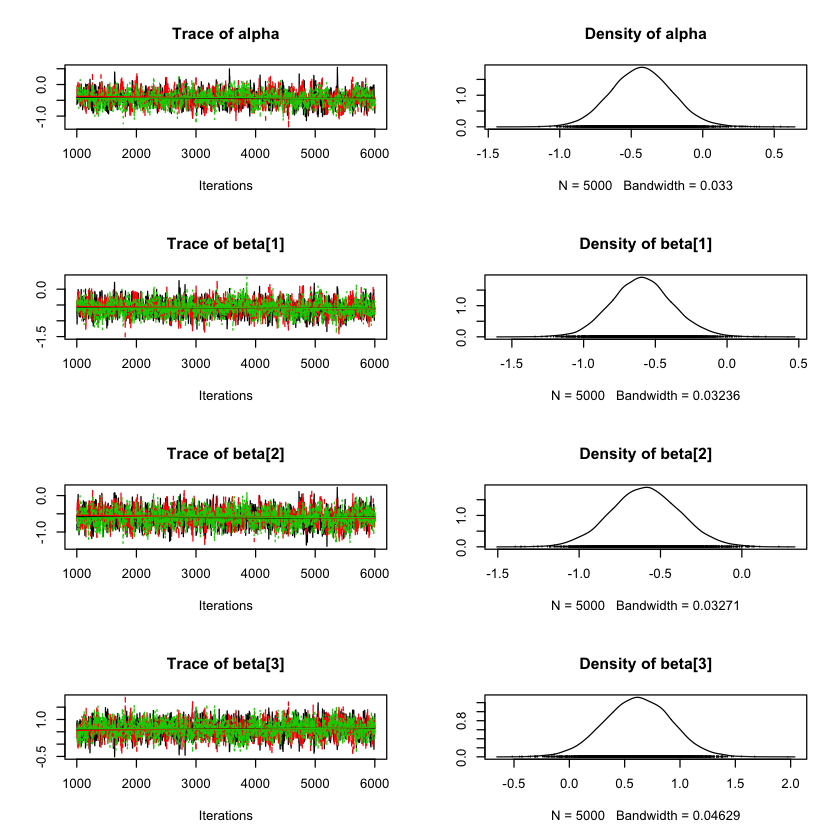

Potential scale reduction factors:

        Point est. Upper C.I.
alpha            1          1
beta[1]          1          1
beta[2]          1          1
beta[3]          1          1
beta[4]          1          1
int              1          1
sig              1          1

Multivariate psrf

1

alpha       beta[1]     beta[2]     beta[3]     beta[4]     int        
Lag 0   1.00000000  1.00000000  1.00000000  1.00000000  1.00000000  1.00000000
Lag 1   0.83687926  0.75813743  0.75600398  0.75250089  0.75458423  0.84175862
Lag 5   0.45655994  0.34999252  0.36461754  0.34888348  0.36327780  0.45972901
Lag 10  0.26916415  0.20456486  0.21233620  0.21067917  0.20088699  0.26741720
Lag 50 -0.01302799 -0.01105429 -0.02618992 -0.00909144 -0.01709044 -0.01842593
       sig         
Lag 0   1.000000000
Lag 1   0.090473642
Lag 5   0.011746416
Lag 10 -0.002750914
Lag 50  0.002136694

alpha    beta[1]    beta[2]    beta[3]    beta[4]        int        sig 
 1011.5764  1225.0418  1263.3439  1324.4727  1287.9631   994.1399 10822.0324

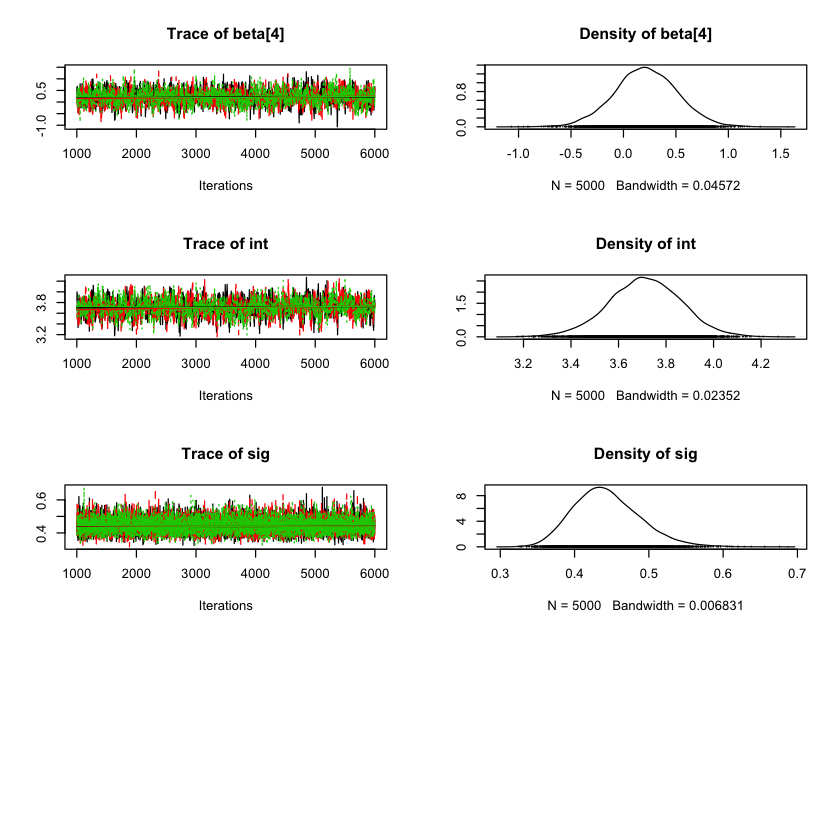

In [23]:
data4_jags = list(y=log(warpbreaks$breaks), isWoolB=X[,"woolB"], isTensionM=X[,"tensionM"], isTensionH=X[,"tensionH"])

params4 = c("int", "alpha", "beta", "sig")

mod4 = jags.model(textConnection(mod4_string), data=data4_jags, n.chains=3)
update(mod4, 1e3)

mod4_sim = coda.samples(model=mod4,
                        variable.names=params4,
                        n.iter=5e3)

## convergene diagnostics
plot(mod4_sim)

gelman.diag(mod4_sim)
autocorr.diag(mod4_sim)
effectiveSize(mod4_sim)

In [24]:
summary(mod4_sim)


Iterations = 1001:6000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 5000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

           Mean     SD  Naive SE Time-series SE
alpha   -0.4280 0.2133 0.0017416      0.0067501
beta[1] -0.5922 0.2146 0.0017524      0.0063849
beta[2] -0.5928 0.2111 0.0017239      0.0059488
beta[3]  0.6173 0.2988 0.0024398      0.0082575
beta[4]  0.2136 0.2994 0.0024450      0.0084170
int      3.7114 0.1519 0.0012400      0.0048294
sig      0.4433 0.0446 0.0003642      0.0004318

2. Quantiles for each variable:

            2.5%      25%     50%     75%     97.5%
alpha   -0.83855 -0.57178 -0.4283 -0.2863 -0.005284
beta[1] -1.00181 -0.73449 -0.5946 -0.4546 -0.158431
beta[2] -1.00800 -0.73357 -0.5942 -0.4504 -0.175589
beta[3]  0.02358  0.41779  0.6190  0.8225  1.195512
beta[4] -0.38310  0.01795  0.2120  0.4134  0.802693
int      3.40337  3.61024  3.7118  3.8137  4.007500
sig      0.36677  0.4

In [26]:
summary(lmod2)


Call:
lm(formula = log(breaks) ~ .^2, data = warpbreaks)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81504 -0.27885  0.04042  0.27319  0.64358 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.7179     0.1247  29.824  < 2e-16 ***
woolB           -0.4356     0.1763  -2.471  0.01709 *  
tensionM        -0.6012     0.1763  -3.410  0.00133 ** 
tensionH        -0.6003     0.1763  -3.405  0.00134 ** 
woolB:tensionM   0.6281     0.2493   2.519  0.01514 *  
woolB:tensionH   0.2221     0.2493   0.891  0.37749    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.374 on 48 degrees of freedom
Multiple R-squared:  0.3363,	Adjusted R-squared:  0.2672 
F-statistic: 4.864 on 5 and 48 DF,  p-value: 0.001116


In [27]:
(dic4 = dic.samples(mod4, n.iter=1e3))

Mean deviance:  52.03 
penalty 7.105 
Penalized deviance: 59.14 

In [32]:
dic3

Mean deviance:  52 
penalty 7.272 
Penalized deviance: 59.27 